In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from time import sleep
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

### 1.3

#### 1.3.1

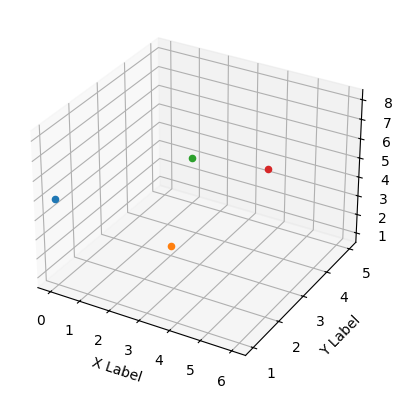

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p1, p2, p3, p4 = np.array([0,1,5]), np.array([2,3,1]), np.array([1,5,3]), np.array([6,2,8])

ax.scatter(*p1)
ax.scatter(*p2)
ax.scatter(*p3)
ax.scatter(*p4)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [3]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def euclidean_distance_sq(point1, point2):
    return np.linalg.norm(point1 - point2)**2

def chebyshev_distance(point1, point2):
    return np.linalg.norm(point1 - point2, ord=np.inf)

def hamming_distance(point1, point2):
    return np.linalg.norm(point1 - point2, ord=1)

In [4]:
point_pairs = [point for point in combinations([p1, p2, p3, p4], 2)]

In [5]:
for pair in point_pairs:
    print(f"""{pair[0]} --- {pair[1]},
          Euclidian -> {euclidean_distance(*pair)},
          Euclidian^2 -> {euclidean_distance_sq(*pair)},
          Chebyshev -> {chebyshev_distance(*pair)},
          Hamming -> {hamming_distance(*pair)}""",
          end='\n\n')

[0 1 5] --- [2 3 1],
          Euclidian -> 4.898979485566356,
          Euclidian^2 -> 23.999999999999996,
          Chebyshev -> 4.0,
          Hamming -> 8.0

[0 1 5] --- [1 5 3],
          Euclidian -> 4.58257569495584,
          Euclidian^2 -> 21.0,
          Chebyshev -> 4.0,
          Hamming -> 7.0

[0 1 5] --- [6 2 8],
          Euclidian -> 6.782329983125268,
          Euclidian^2 -> 46.0,
          Chebyshev -> 6.0,
          Hamming -> 10.0

[2 3 1] --- [1 5 3],
          Euclidian -> 3.0,
          Euclidian^2 -> 9.0,
          Chebyshev -> 2.0,
          Hamming -> 5.0

[2 3 1] --- [6 2 8],
          Euclidian -> 8.12403840463596,
          Euclidian^2 -> 66.00000000000001,
          Chebyshev -> 7.0,
          Hamming -> 12.0

[1 5 3] --- [6 2 8],
          Euclidian -> 7.681145747868608,
          Euclidian^2 -> 58.99999999999999,
          Chebyshev -> 5.0,
          Hamming -> 13.0



#### 1.3.2

In [6]:
zeros = np.zeros((5, 5))
zeros += np.arange(5)
zeros

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

### 2.3

#### 2.3.1

In [7]:
data = sns.load_dataset('iris')
data

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


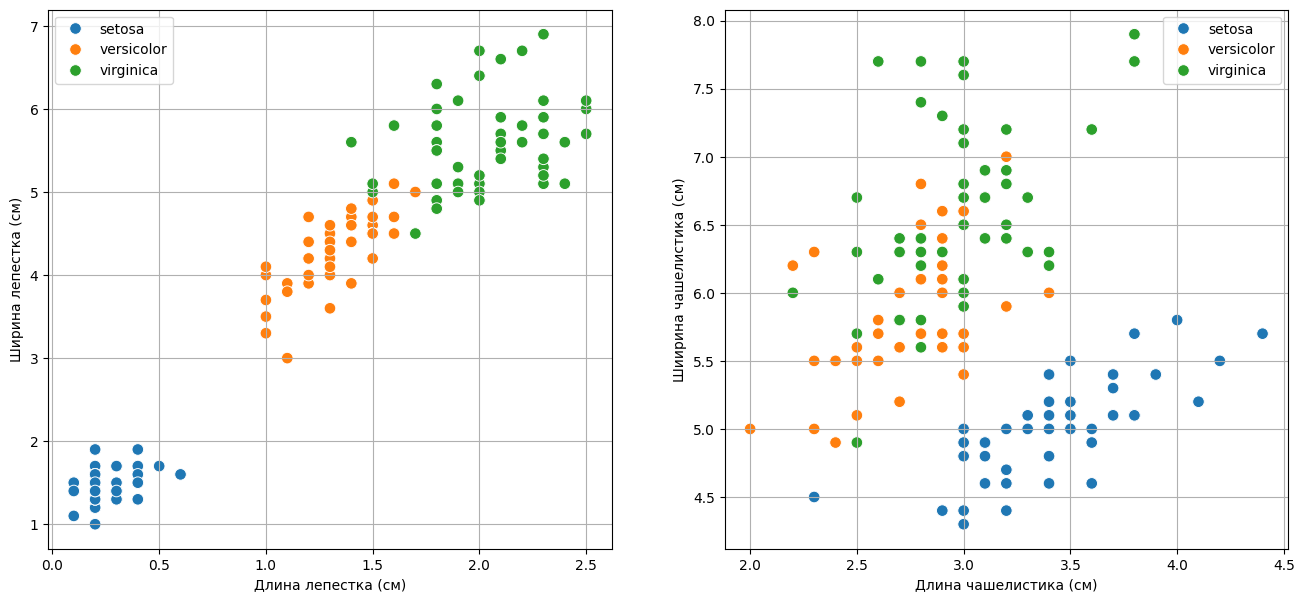

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(
    data=data,
    x = 'petal_width', y = 'petal_length',
    hue = 'species',
    s = 70
)

plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=data,
    x = 'sepal_width', y = 'sepal_length',
    hue = 'species',
    s = 70
)

plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Шиирина чашелистика (см)')
plt.legend()
plt.grid()

In [12]:
def apply_params_and_train(data, test_size=0.4, random_state=42, n_neighbors=5):
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('species', axis=1),
        data['species'],
        test_size=test_size,
        random_state=random_state
    )

    print(X_train.head(),
          y_train.head(),
          sep='\n\n')

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return {'accuracy': accuracy_score(y_test, y_pred),
            'prediction': y_pred,
            'y_test': y_test,
            'y_pred': y_pred,
            'X_test': X_test}

In [13]:
def visualize_errors_plt(data, y_pred, y_test, X_test, test_size, n_neighbors, accuracy, exp_index):
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    sns.scatterplot(
        data=data,
        x = 'petal_width', y = 'petal_length',
        hue = 'species',
        s = 70
    )

    plt.xlabel('Длина лепестка (см)')
    plt.ylabel('Ширина лепестка (см)')
    plt.legend()
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=100)

    plt.subplot(122)
    sns.scatterplot(
        data=data,
        x = 'sepal_width', y = 'sepal_length',
        hue = 'species',
        s = 70
    )

    plt.xlabel('Длина чашелистика (см)')
    plt.ylabel('Ширина чашелистика (см)')
    plt.legend()
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=100)

    plt.title(
        f'Эксперимент {exp_index + 1}: test_size={test_size}, n_neighbors={n_neighbors}, accuracy={accuracy:.4f}'
        )
    

In [14]:
params_grid = {
    'test_size': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'n_neighbors': [1, 3, 5, 7, 10],
}

In [15]:
research_results = {}

test_size = 0.1, n_neighbors = 1
     sepal_length  sepal_width  petal_length  petal_width
56            6.3          3.3           4.7          1.6
104           6.5          3.0           5.8          2.2
69            5.6          2.5           3.9          1.1
55            5.7          2.8           4.5          1.3
132           6.4          2.8           5.6          2.2

56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
Name: species, dtype: object



test_size = 0.1, n_neighbors = 3
     sepal_length  sepal_width  petal_length  petal_width
56            6.3          3.3           4.7          1.6
104           6.5          3.0           5.8          2.2
69            5.6          2.5           3.9          1.1
55            5.7          2.8           4.5          1.3
132           6.4          2.8           5.6          2.2

56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
Name: species, dtype: ob

C:\Users\pyramidheadshark\AppData\Local\Temp\ipykernel_21996\2924525789.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,7))





test_size = 0.3, n_neighbors = 10
     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5

81     versicolor
133     virginica
137     virginica
75     versicolor
109     virginica
Name: species, dtype: object



test_size = 0.35, n_neighbors = 1
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
67            5.8          2.7           4.1          1.0
28            5.2          3.4           1.4          0.2
40            5.0          3.5           1.3          0.3

0          setosa
122     virginica
67     versicolor
28         setosa
40         setosa
Name: species, dtyp

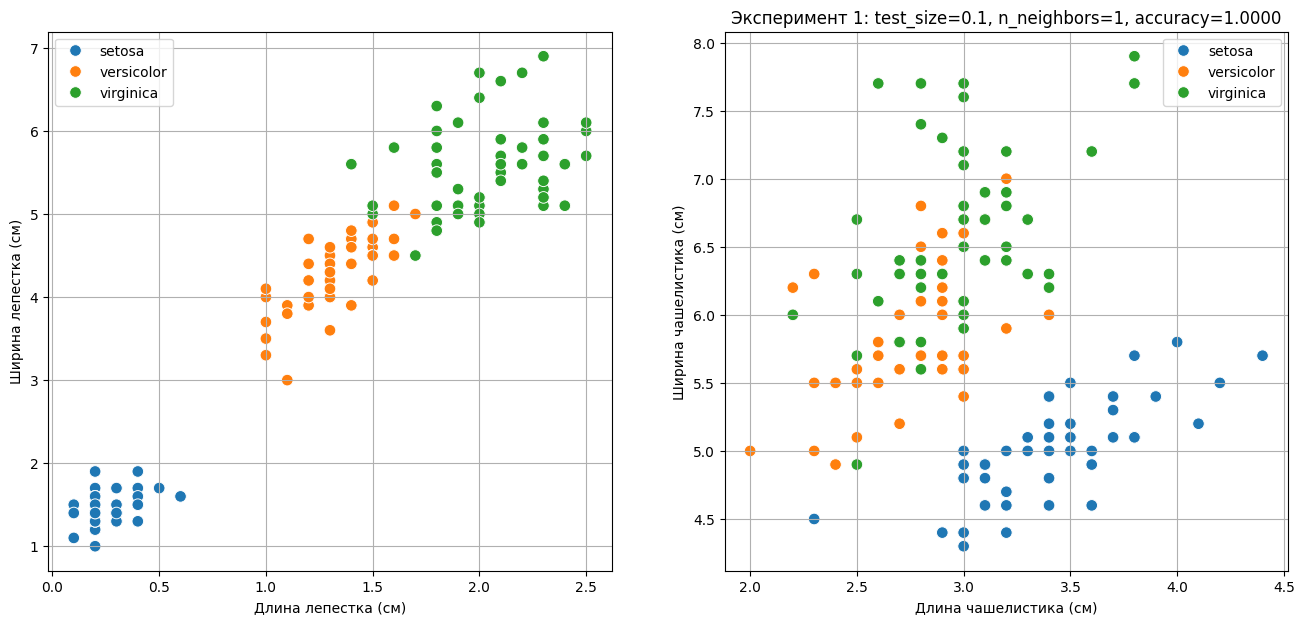

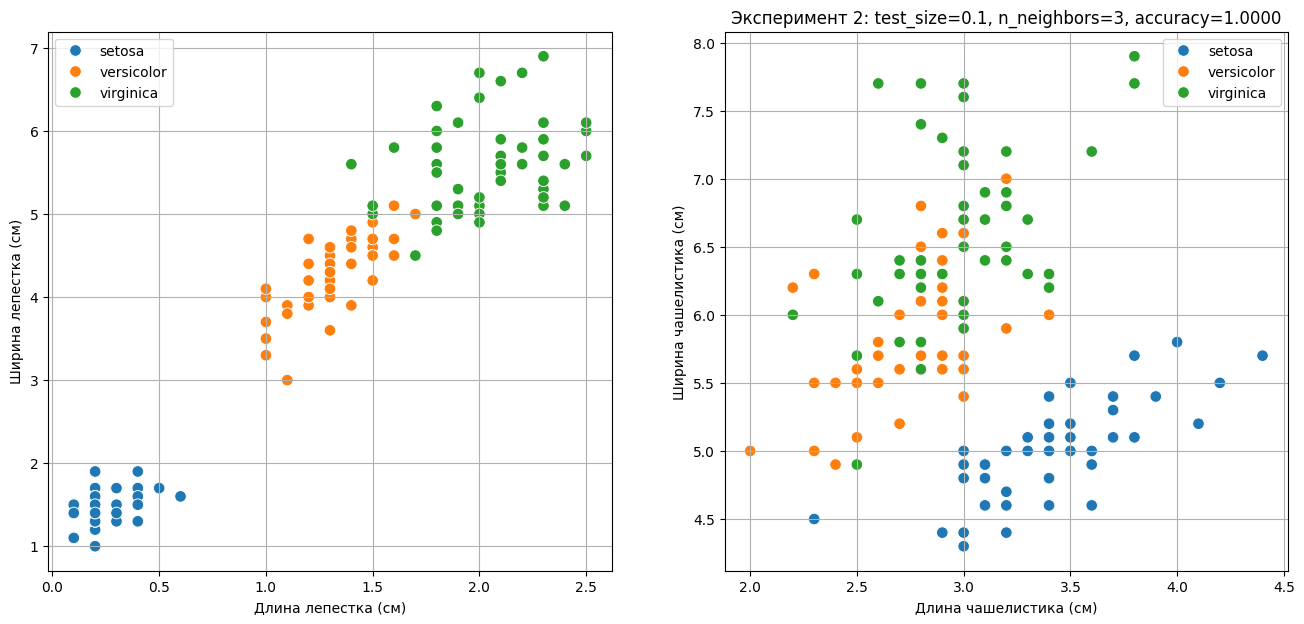

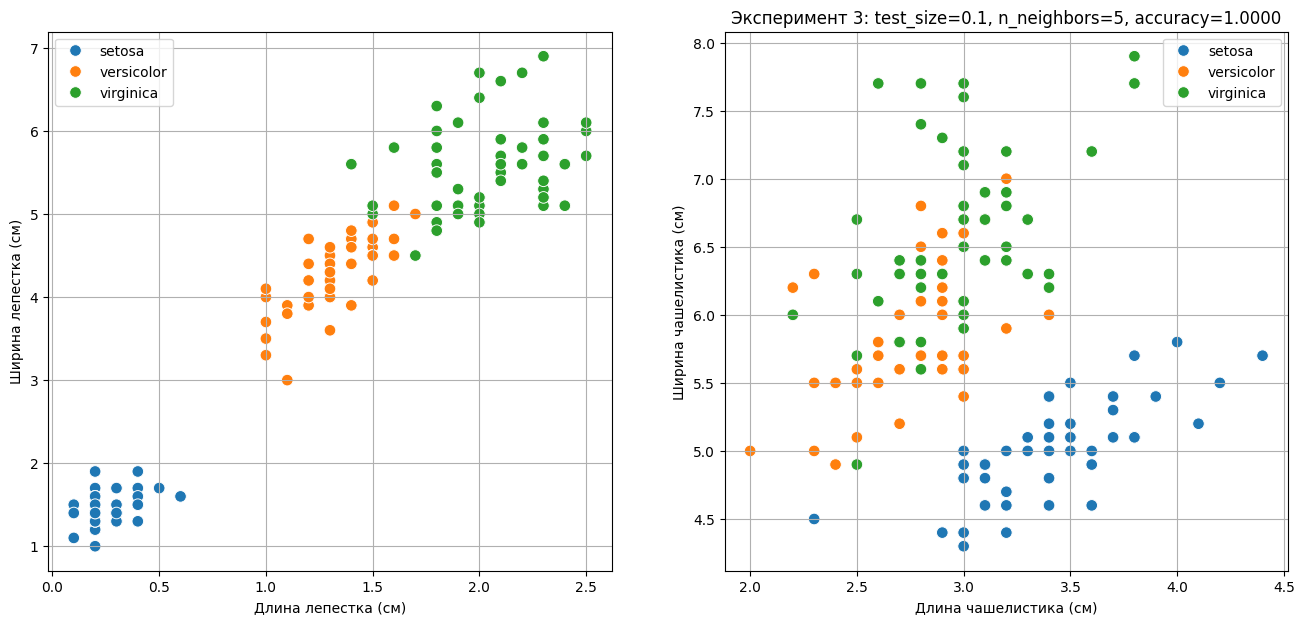

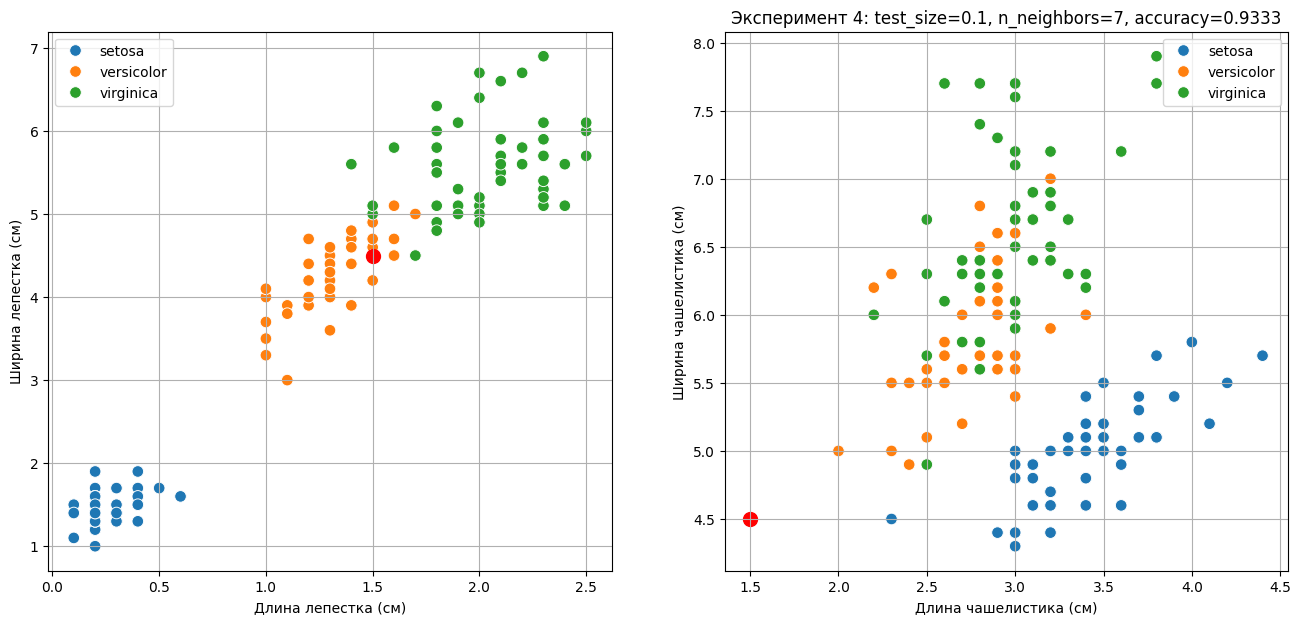

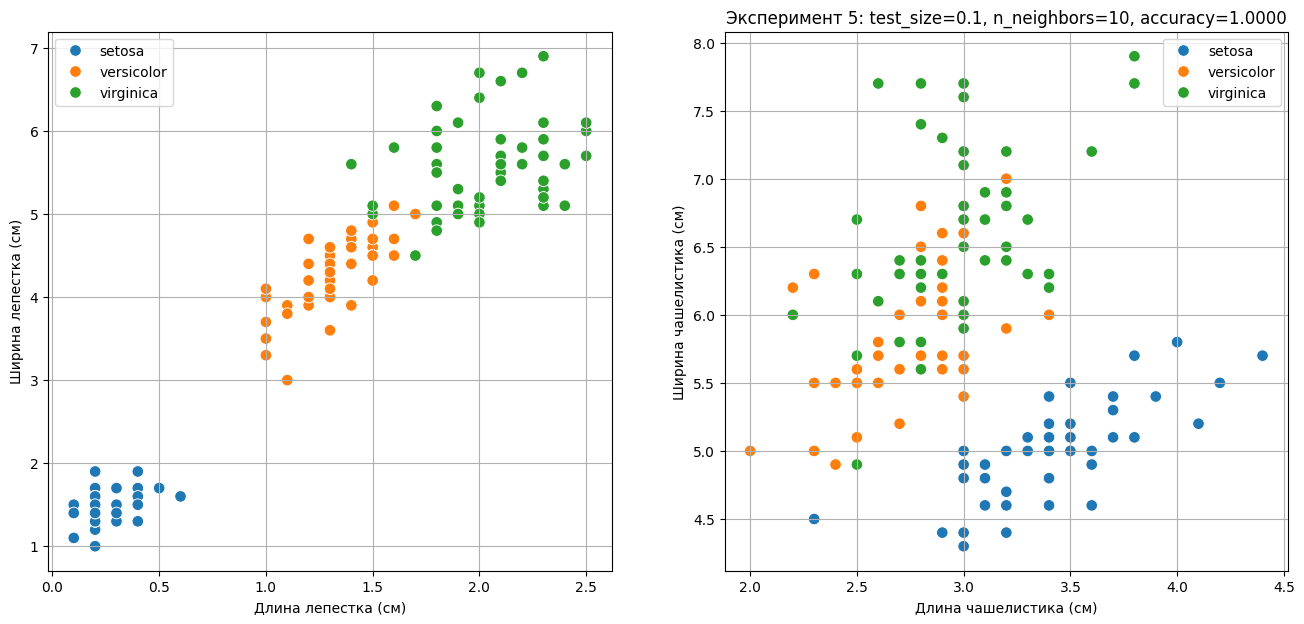

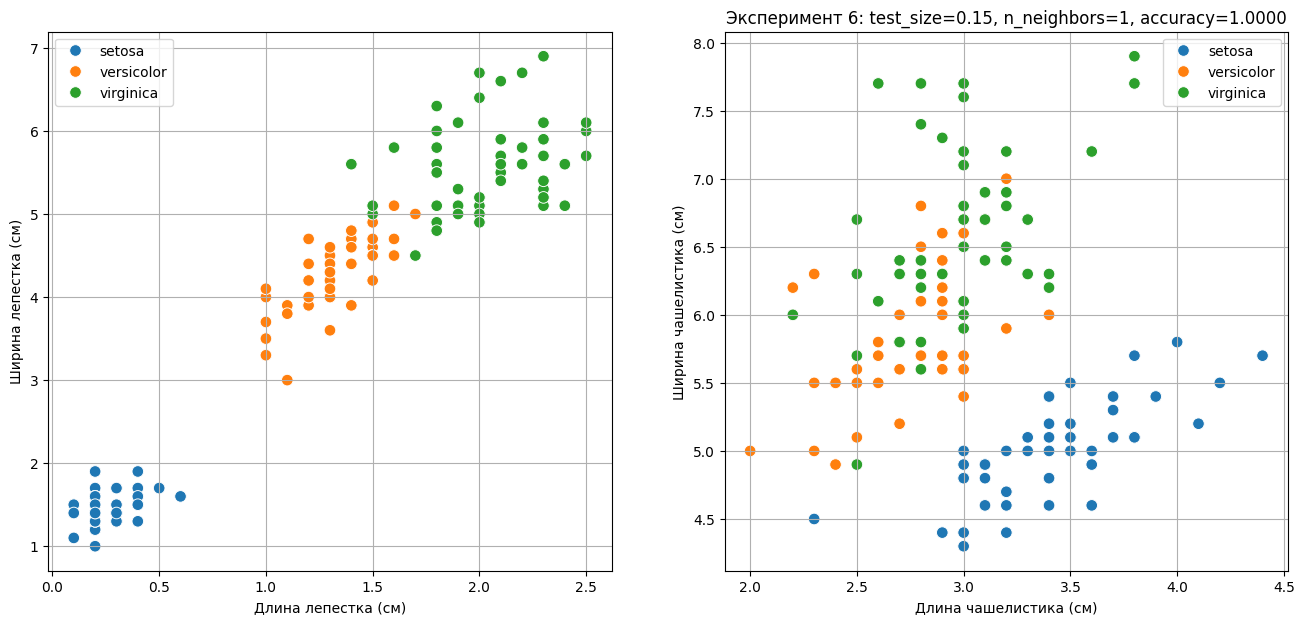

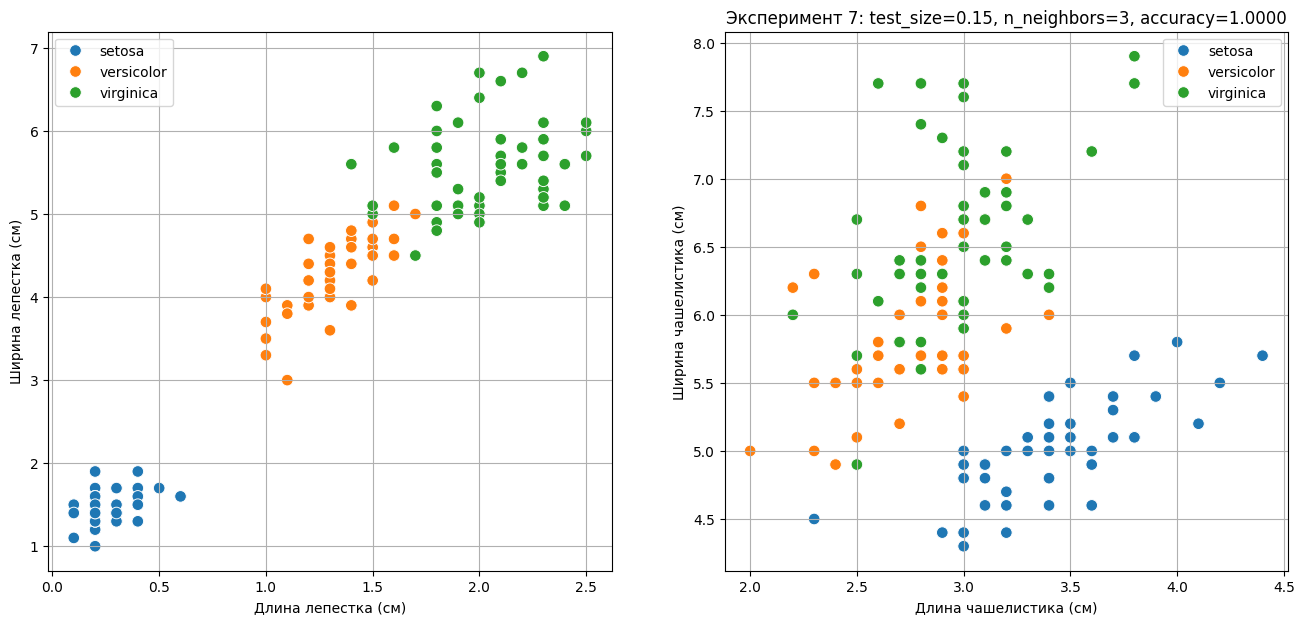

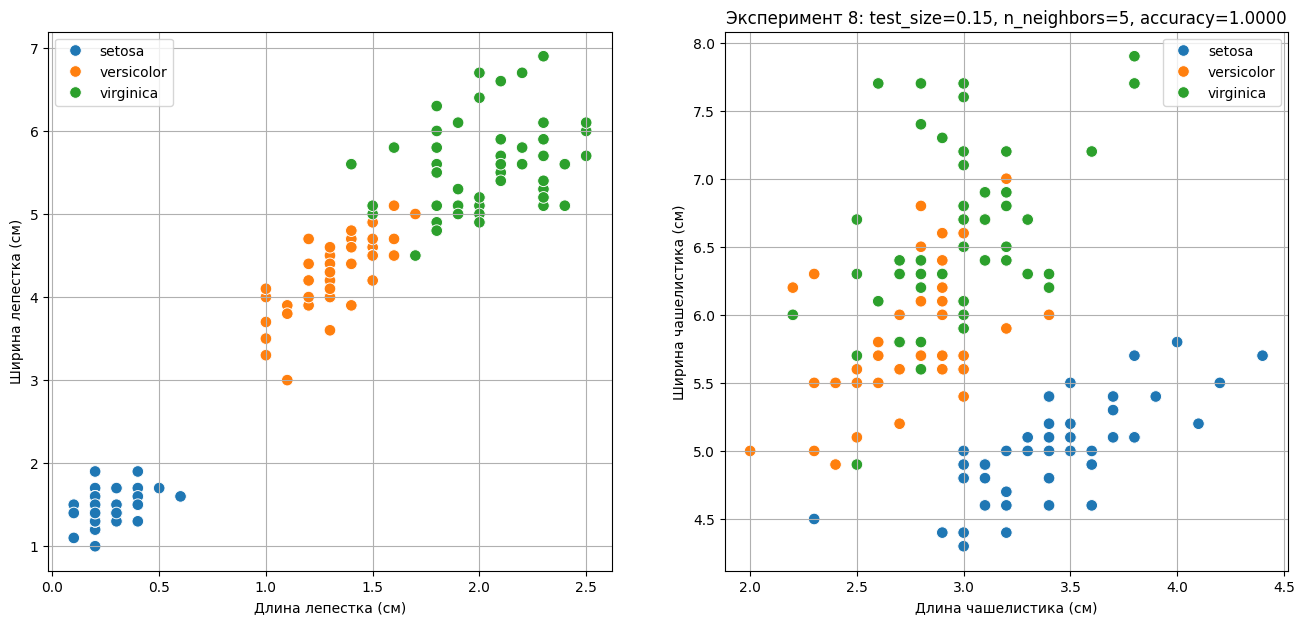

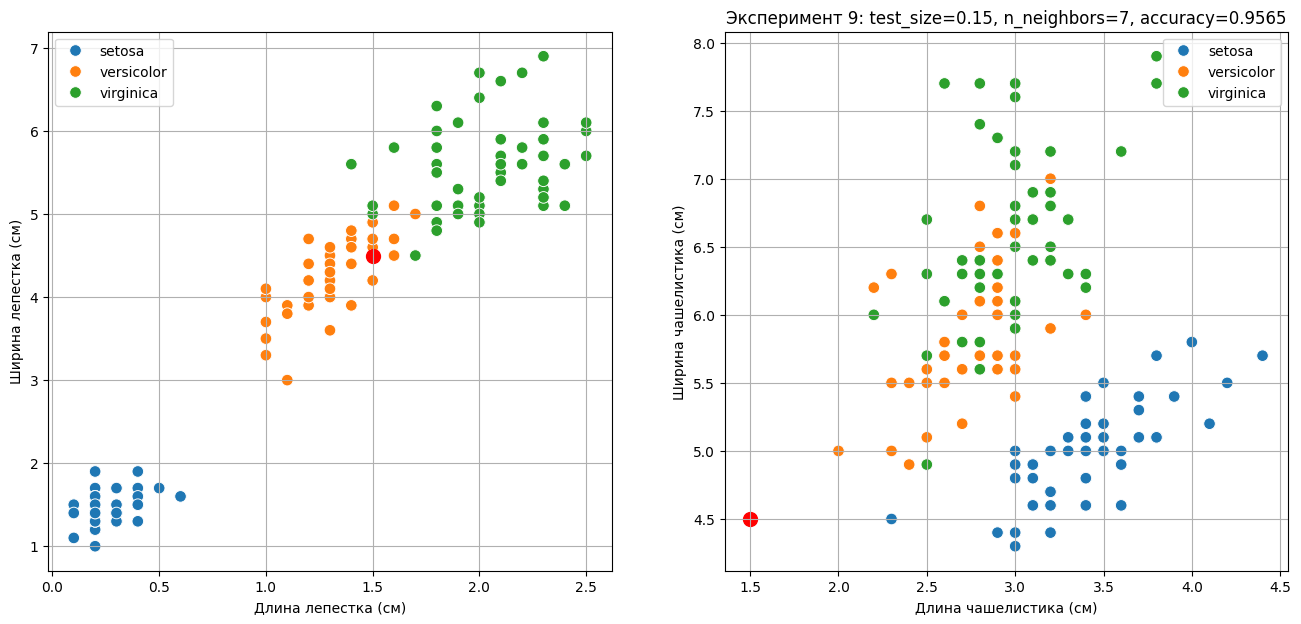

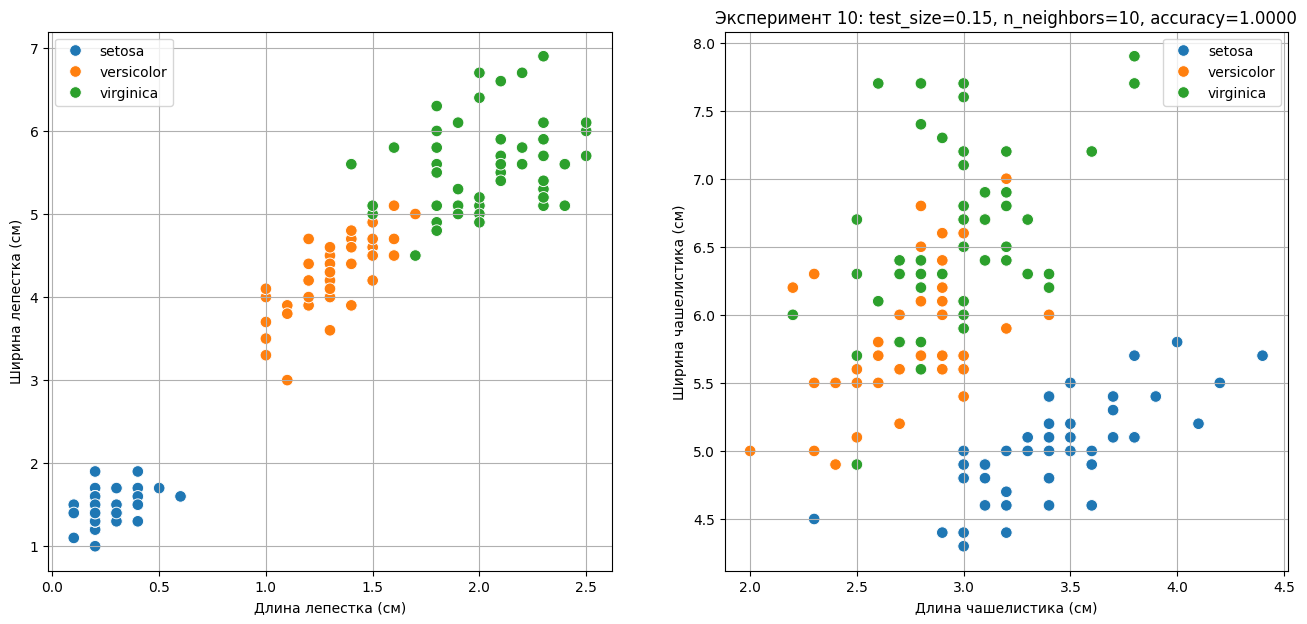

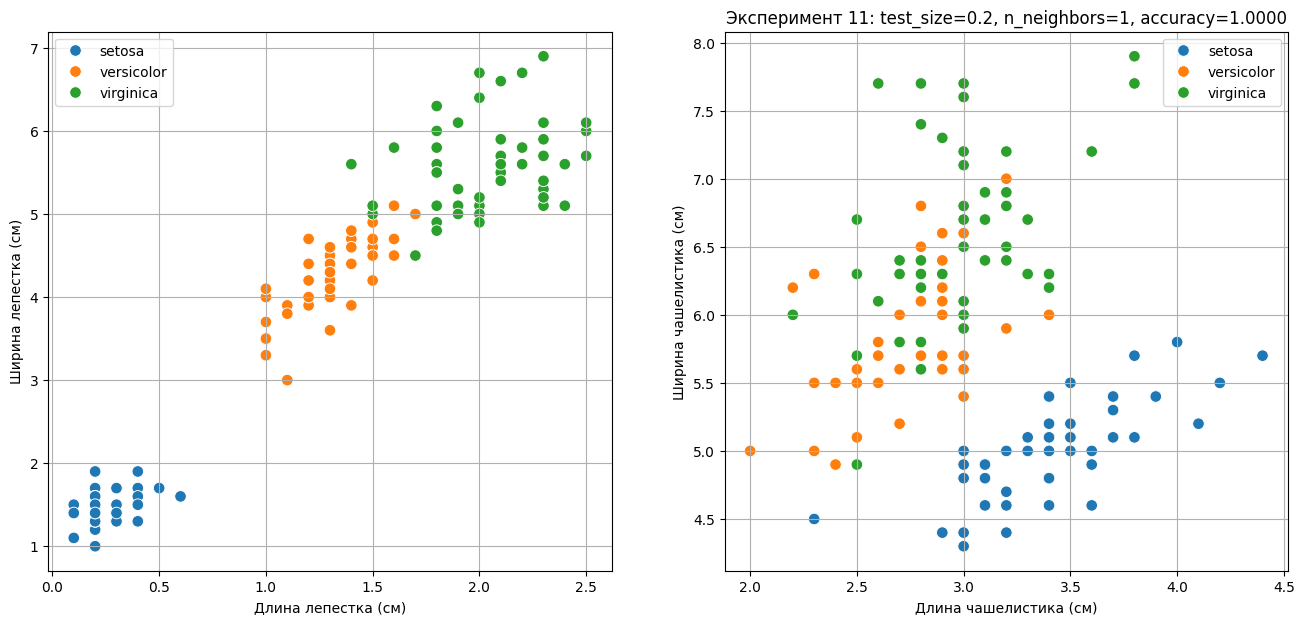

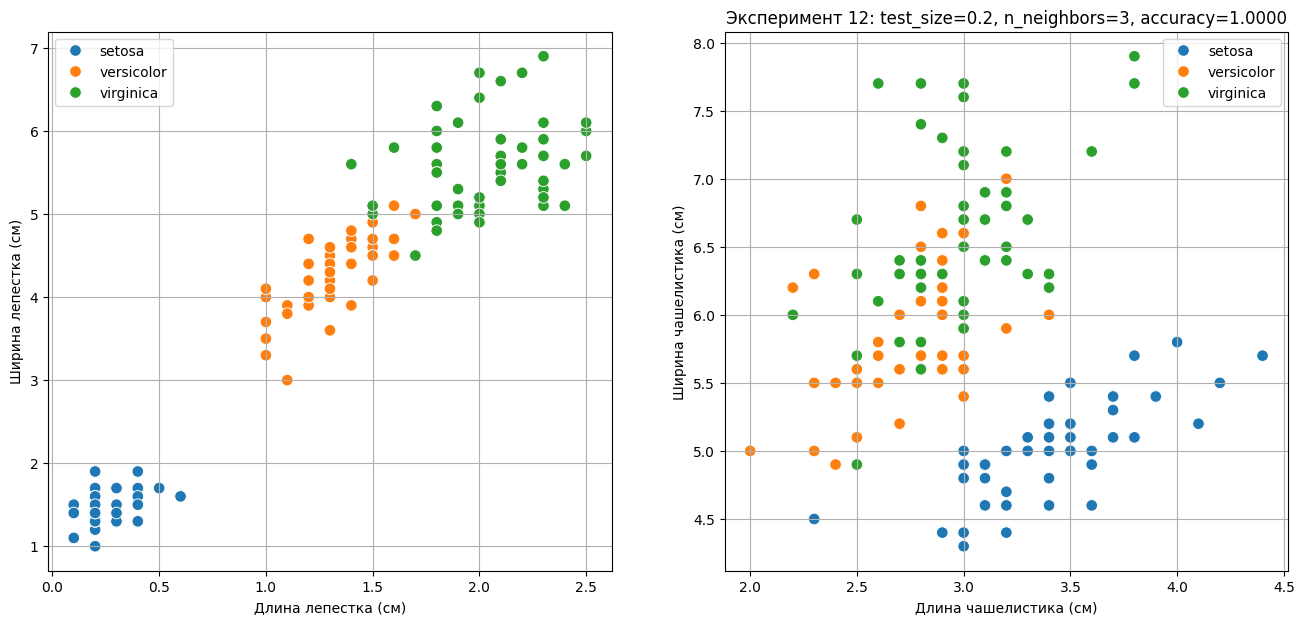

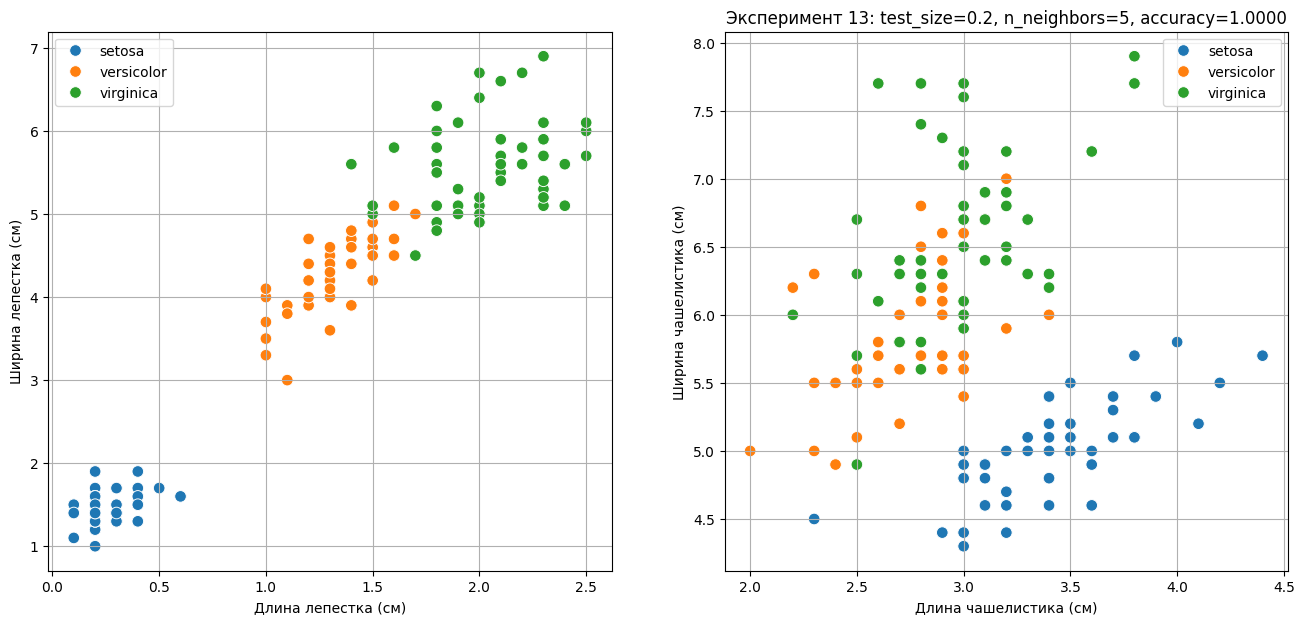

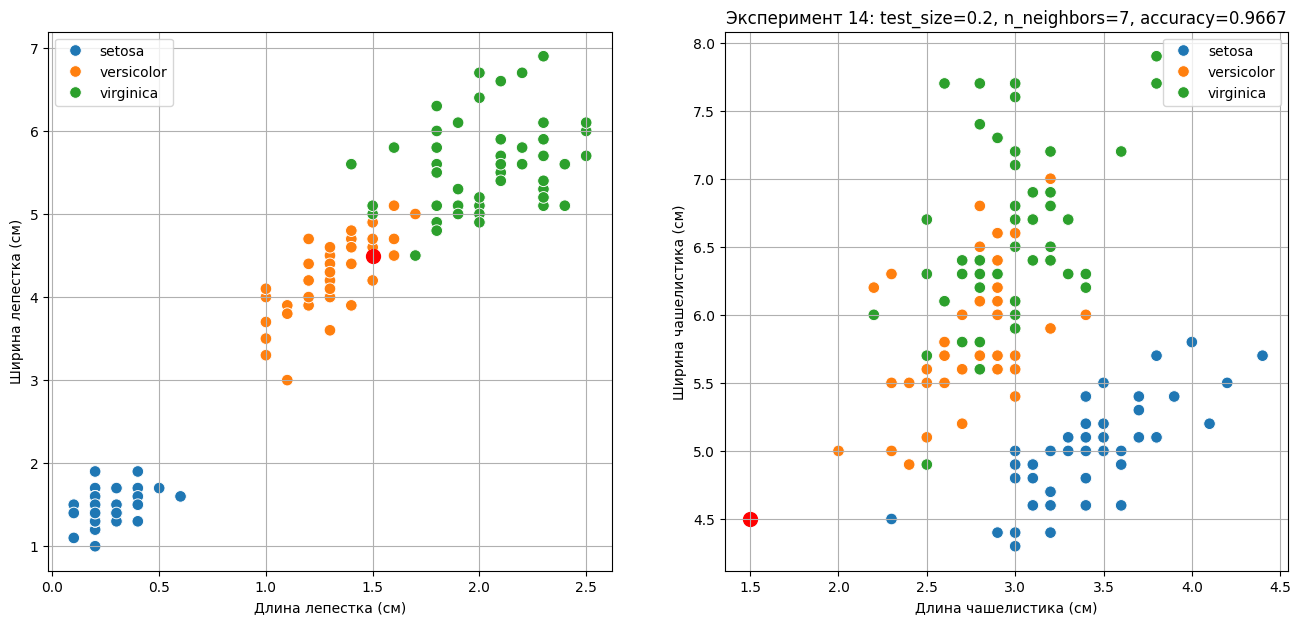

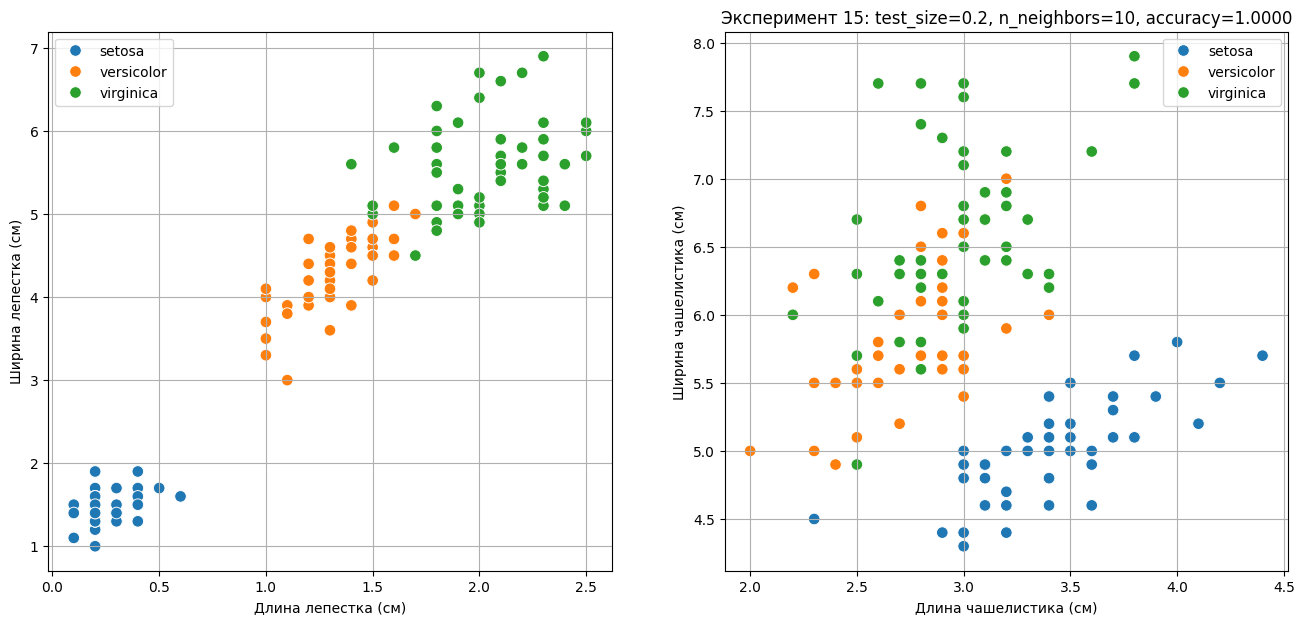

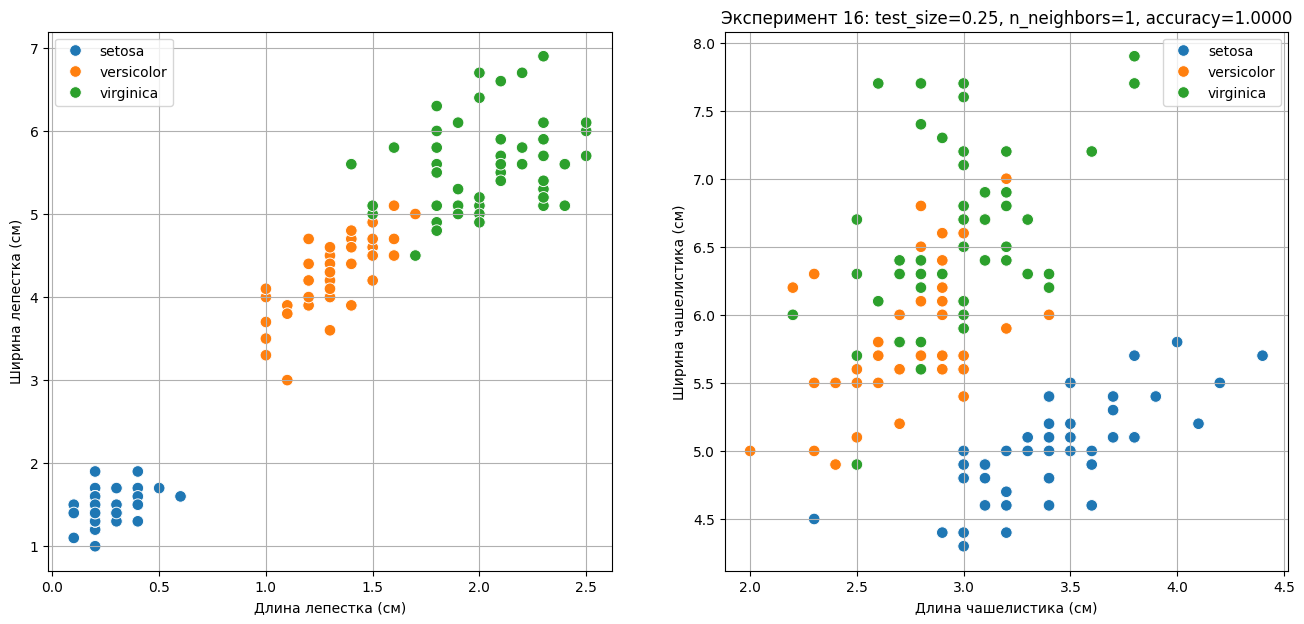

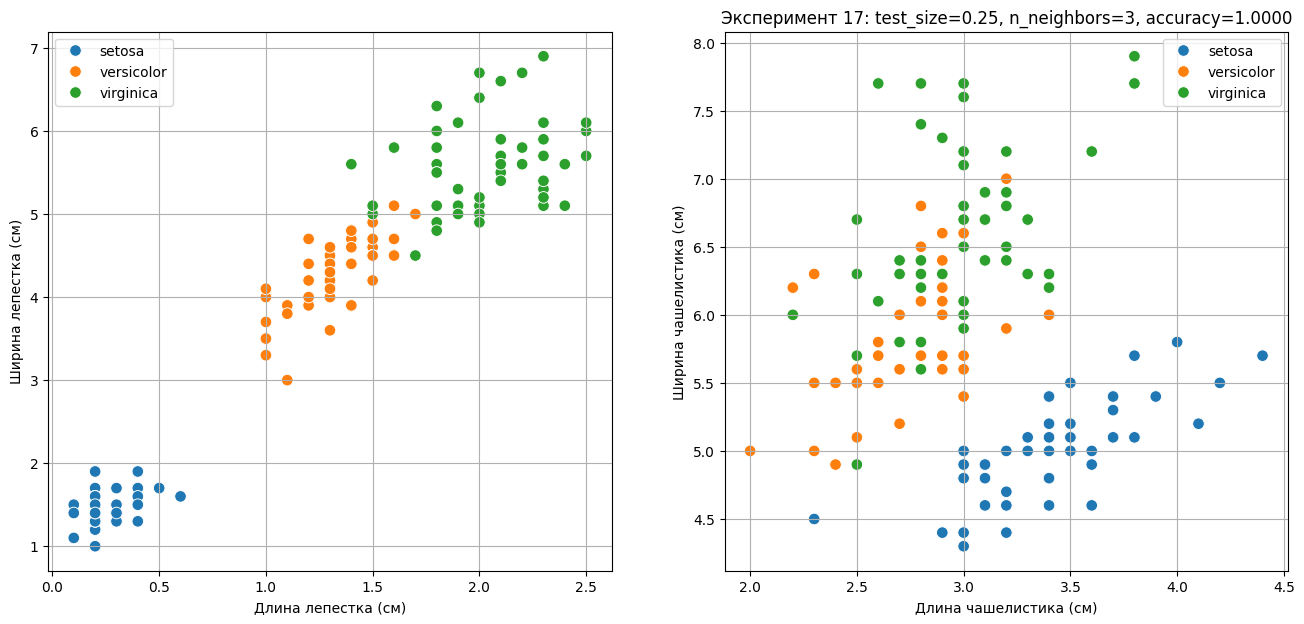

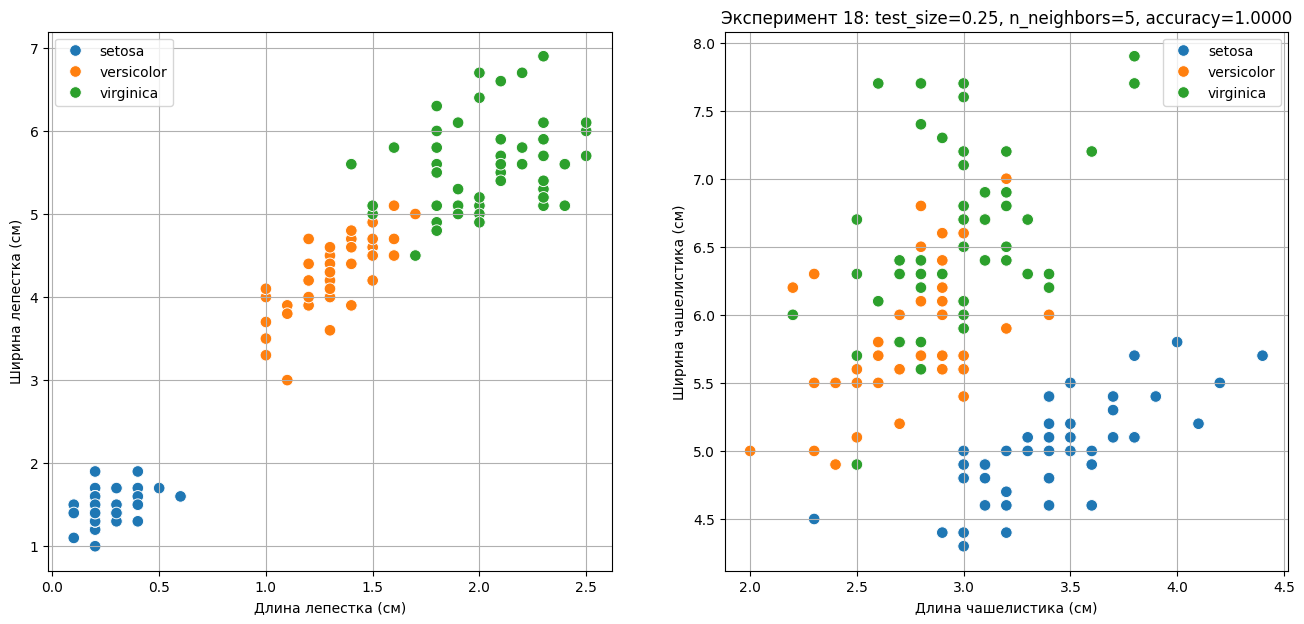

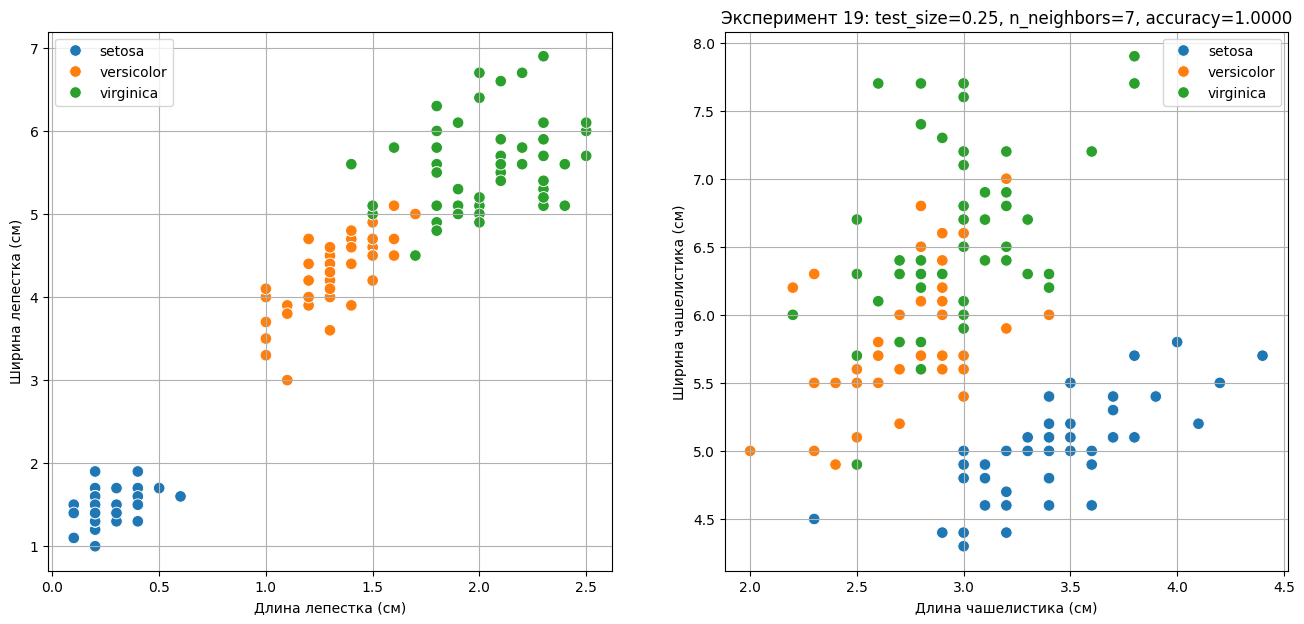

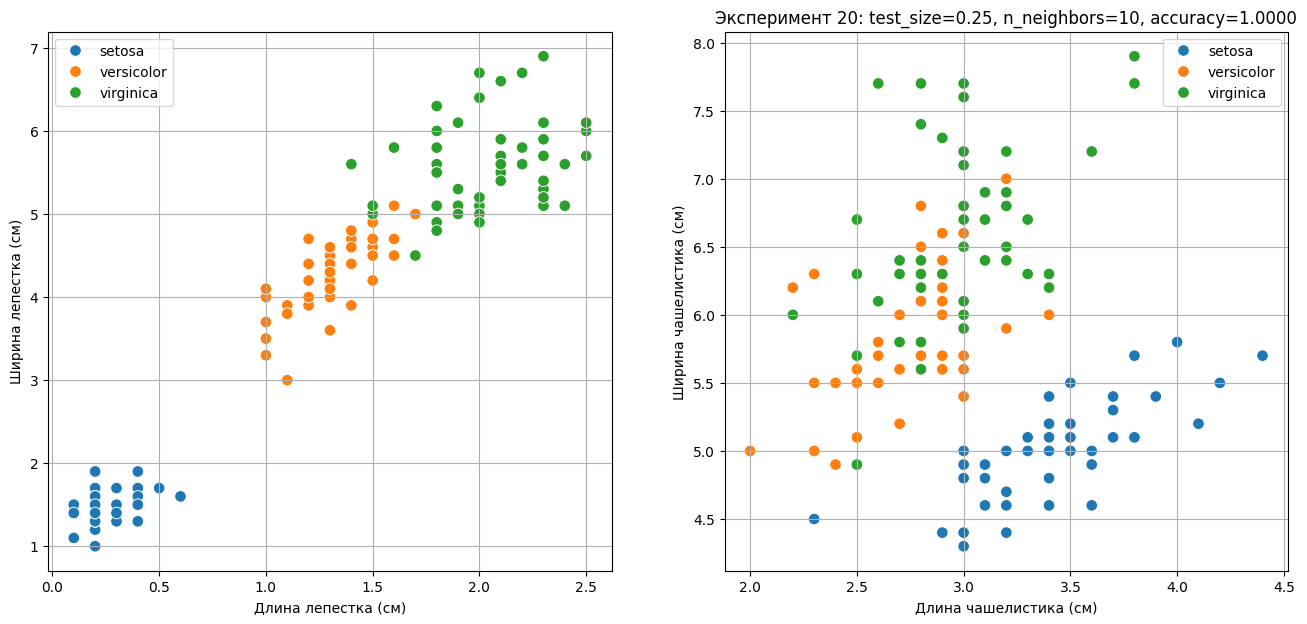

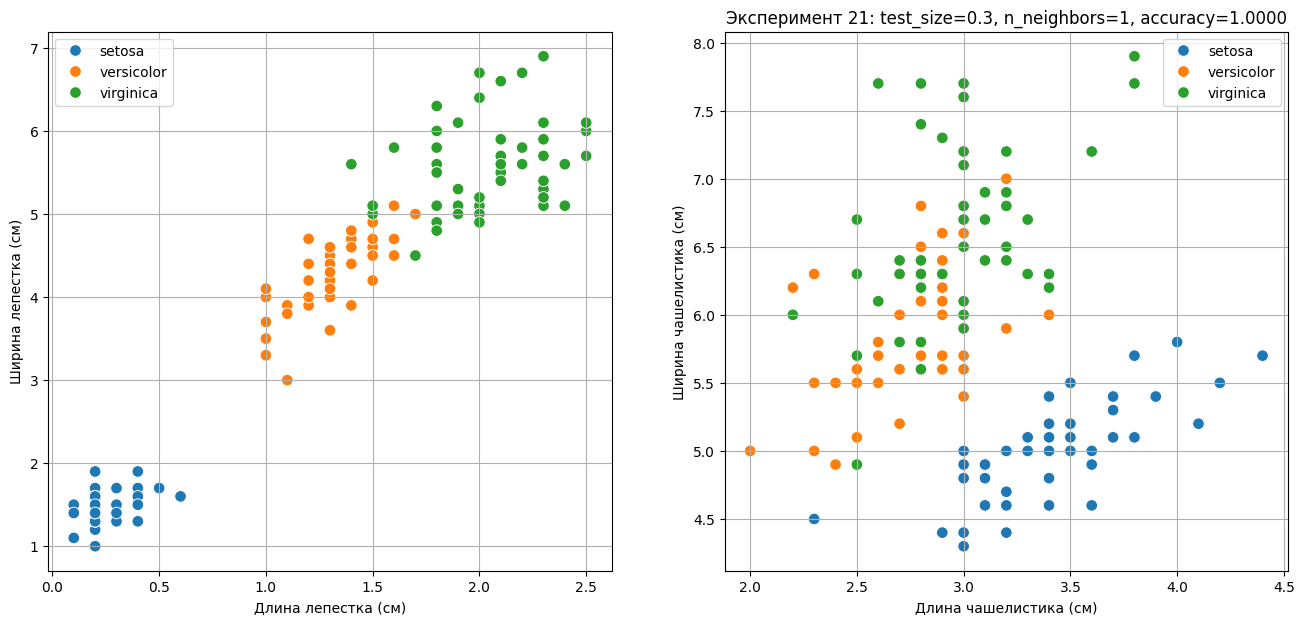

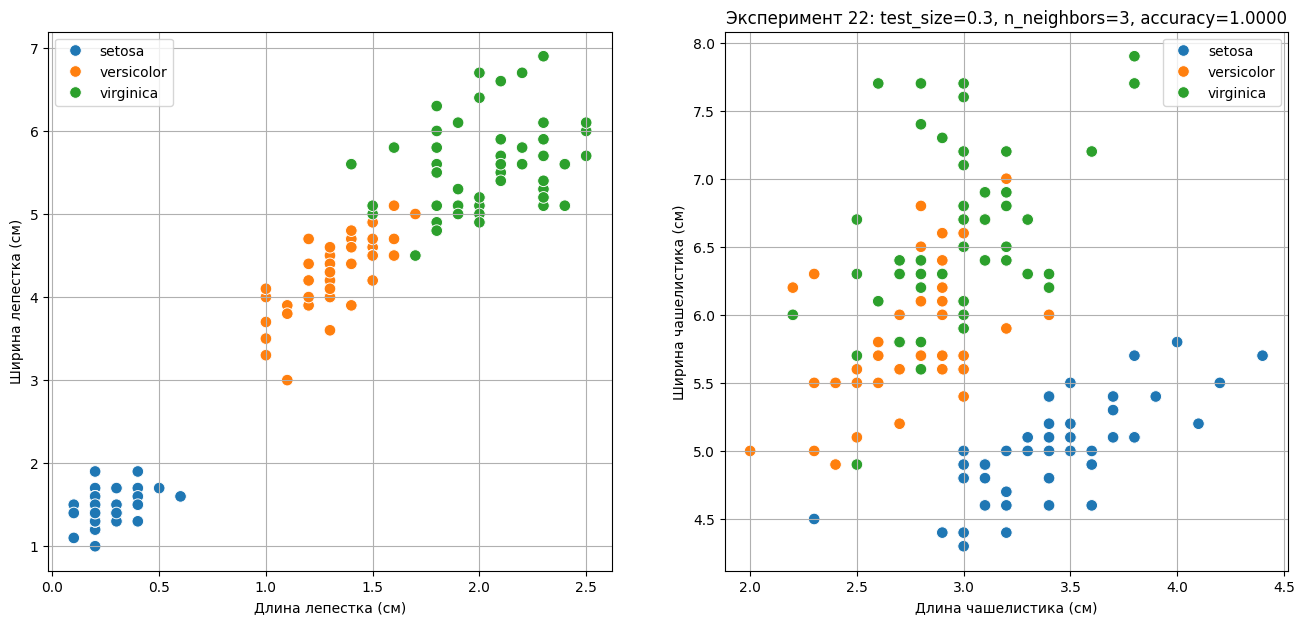

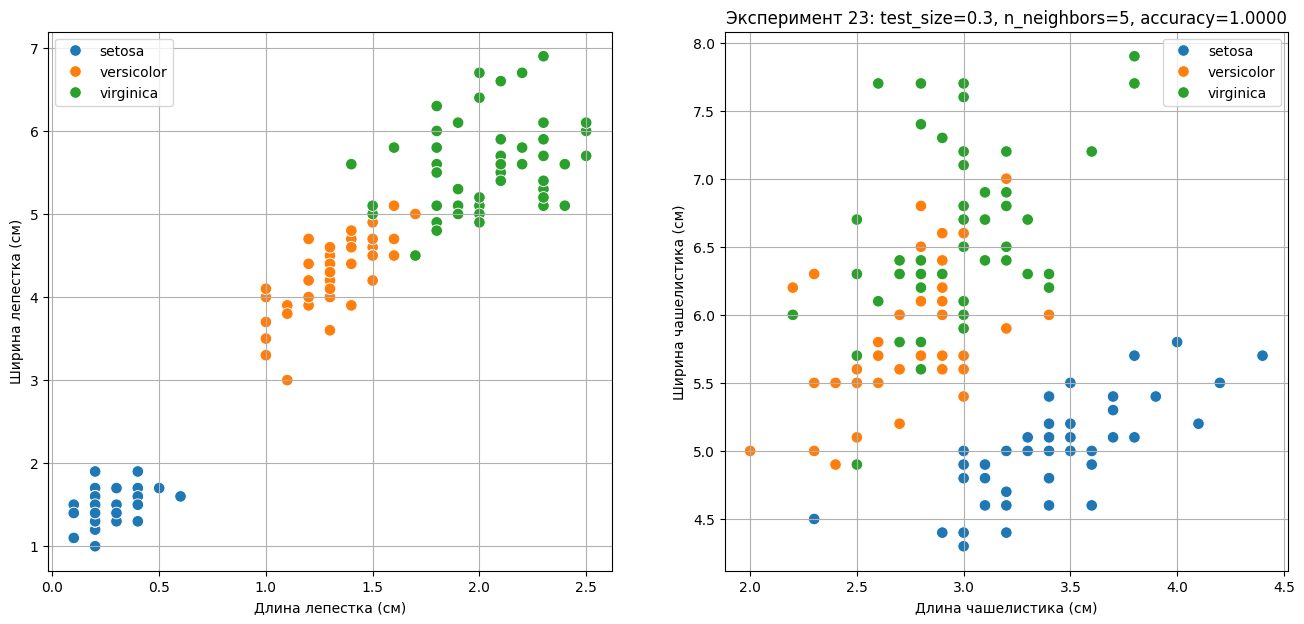

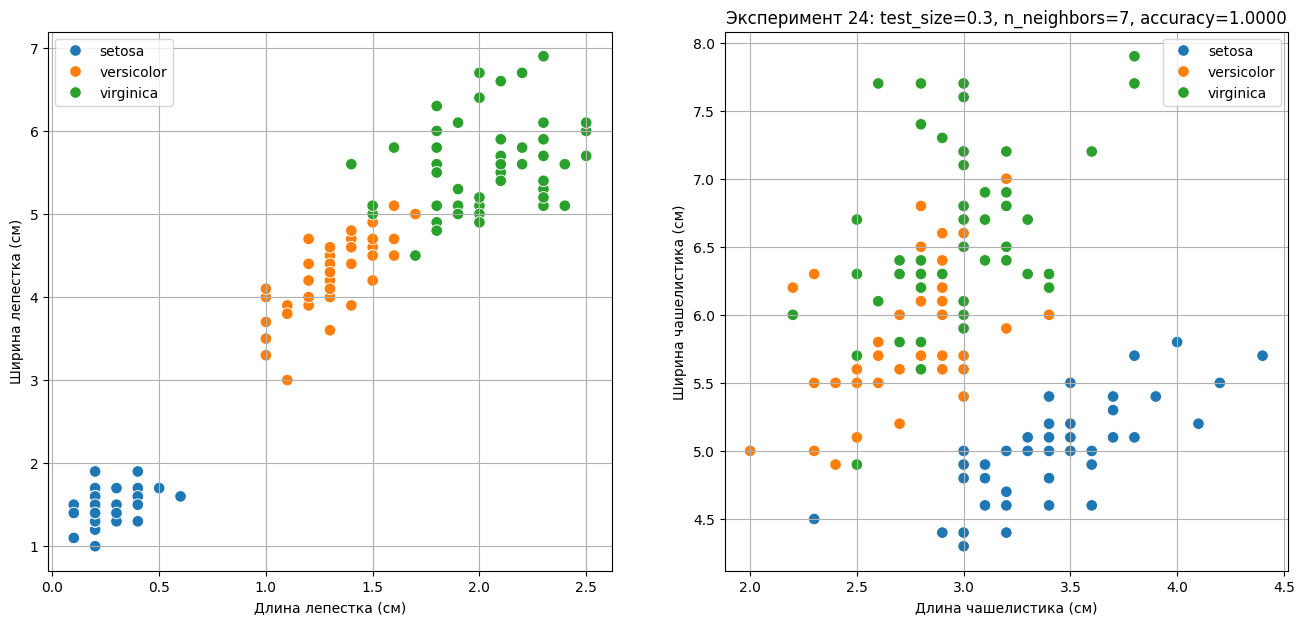

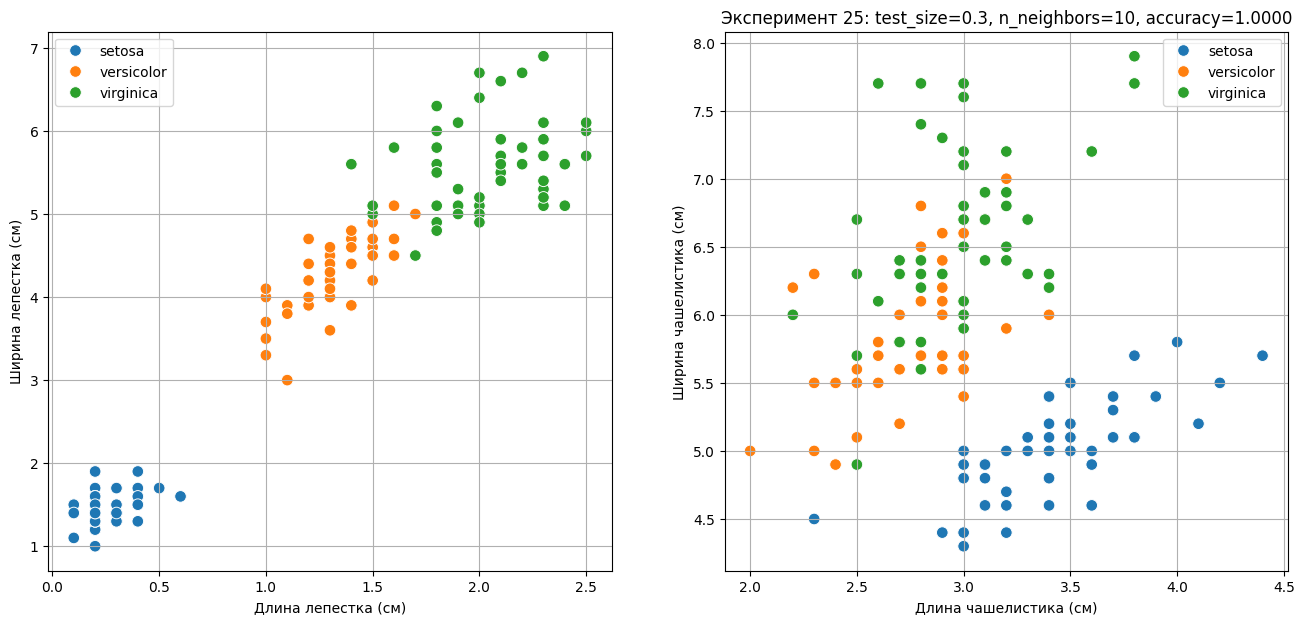

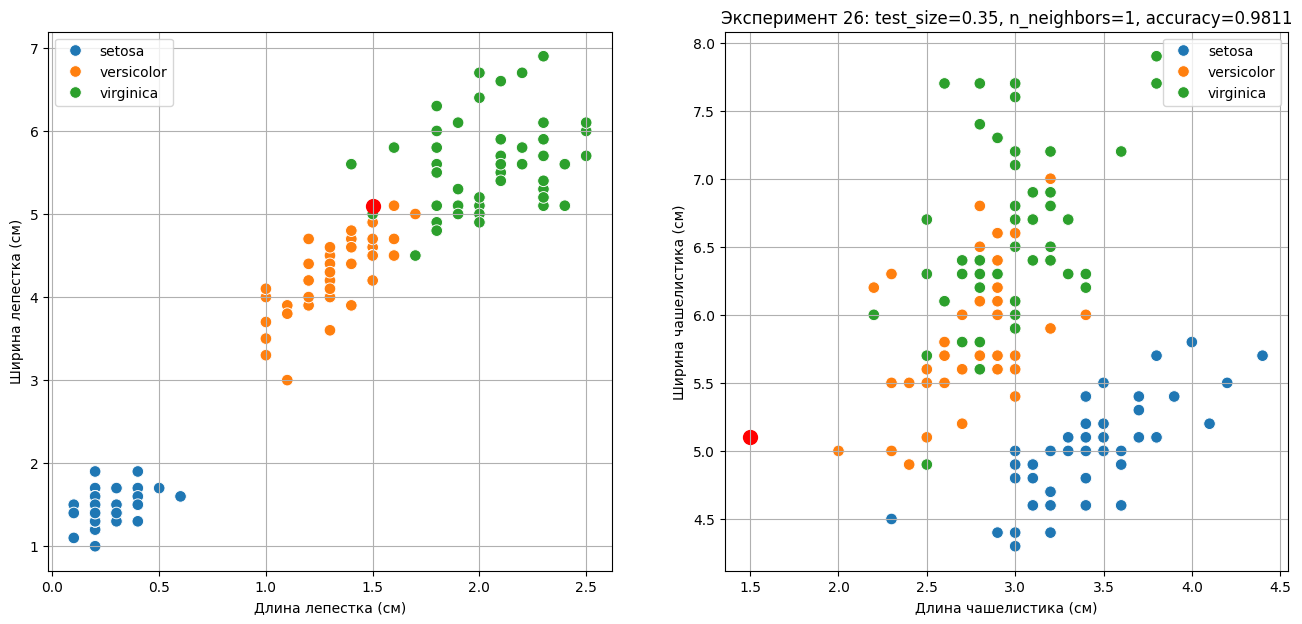

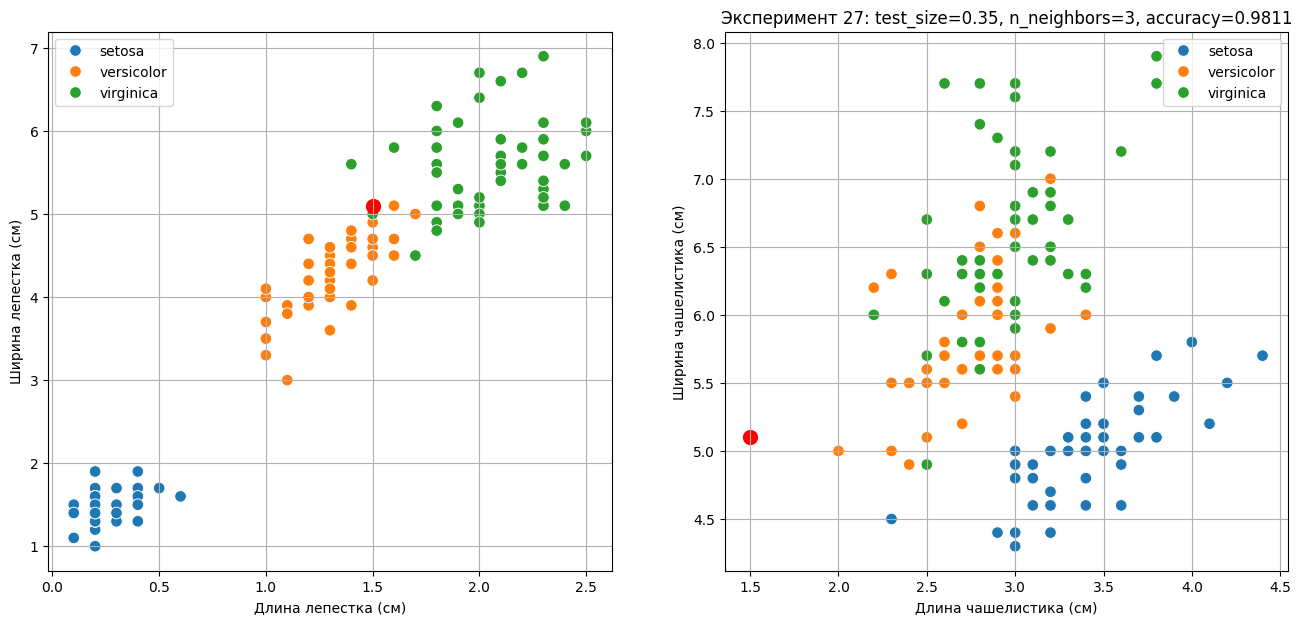

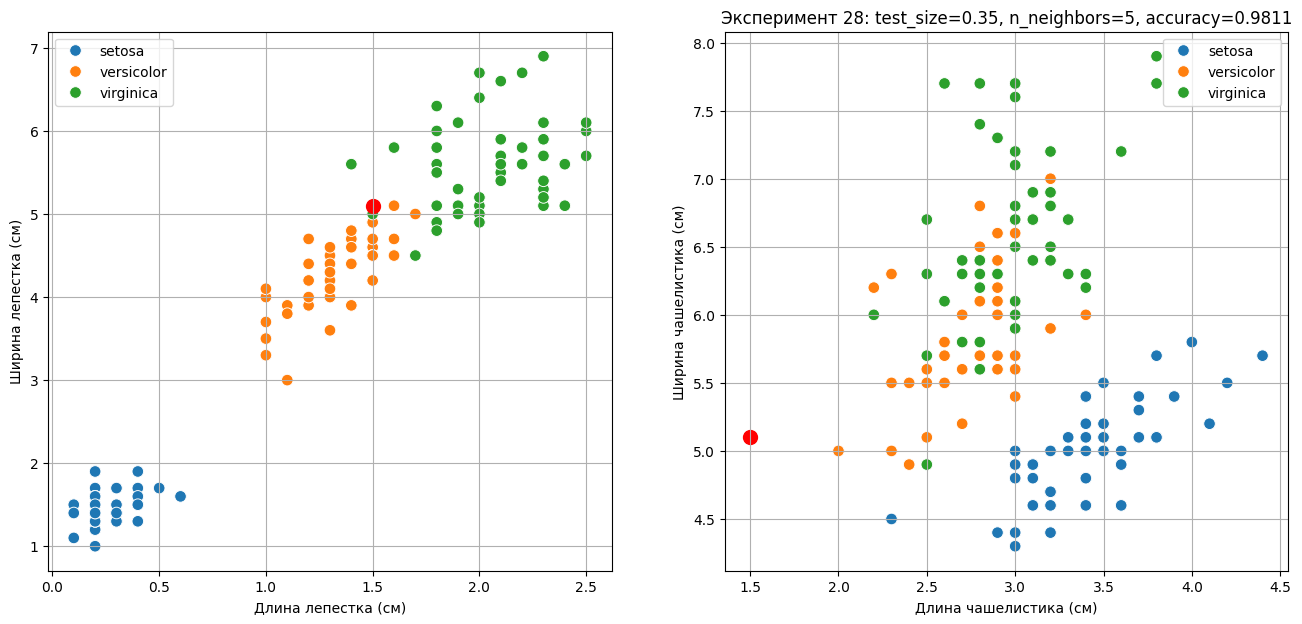

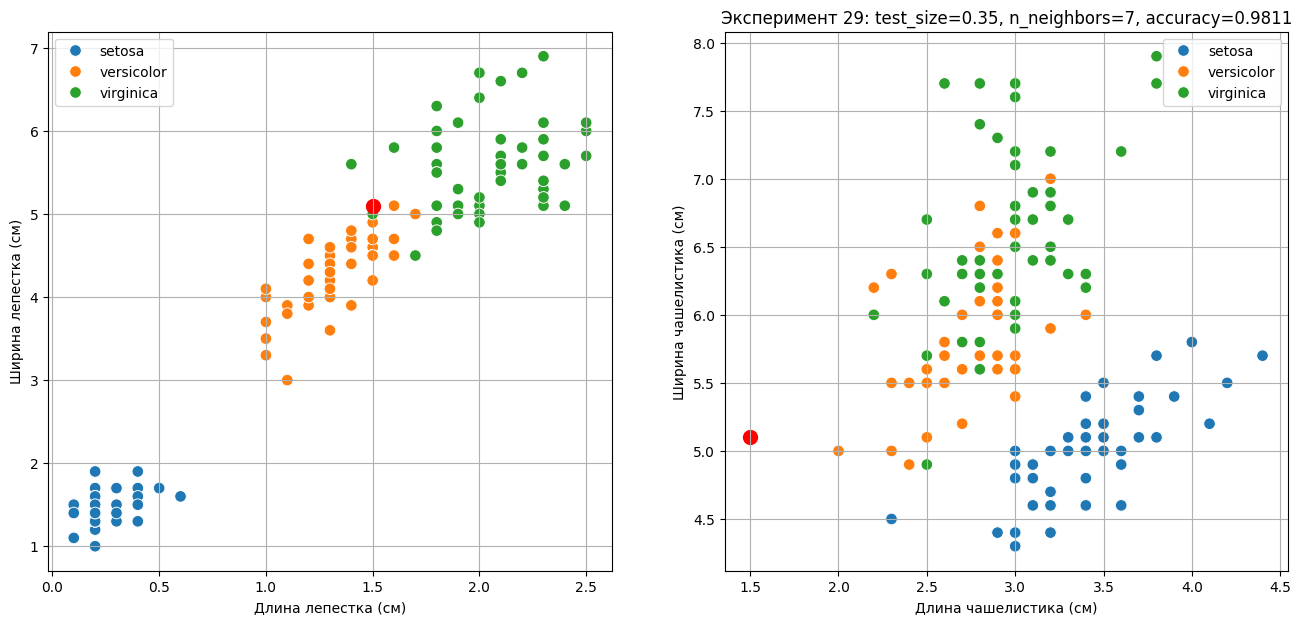

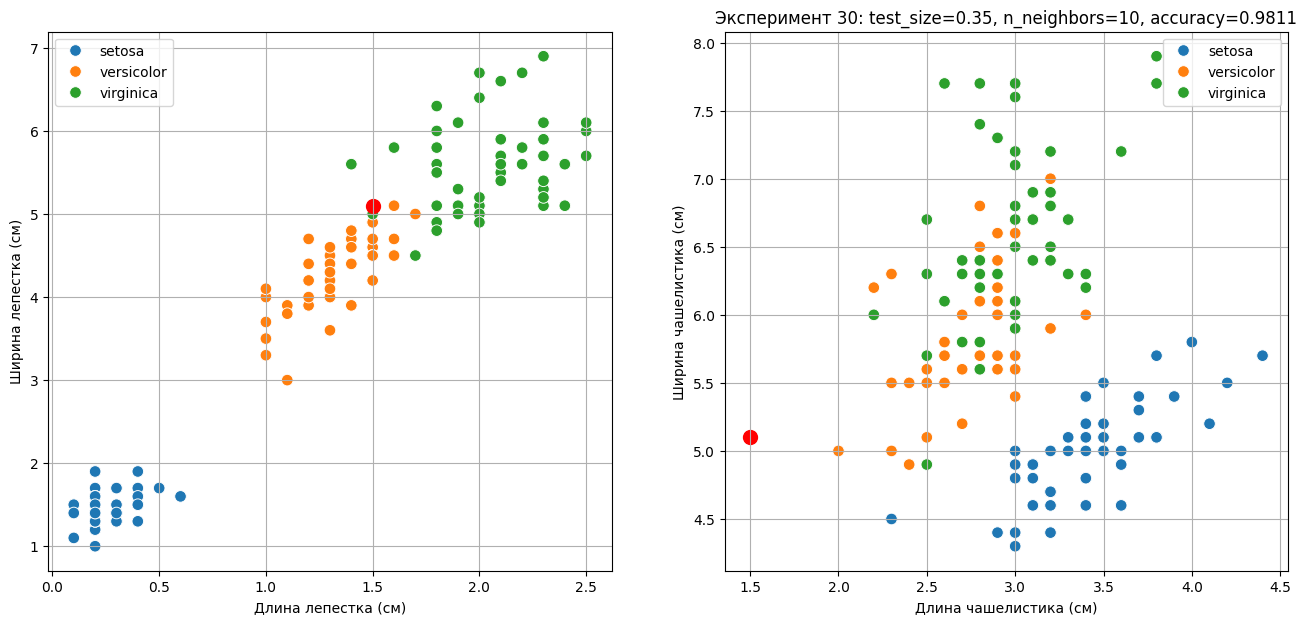

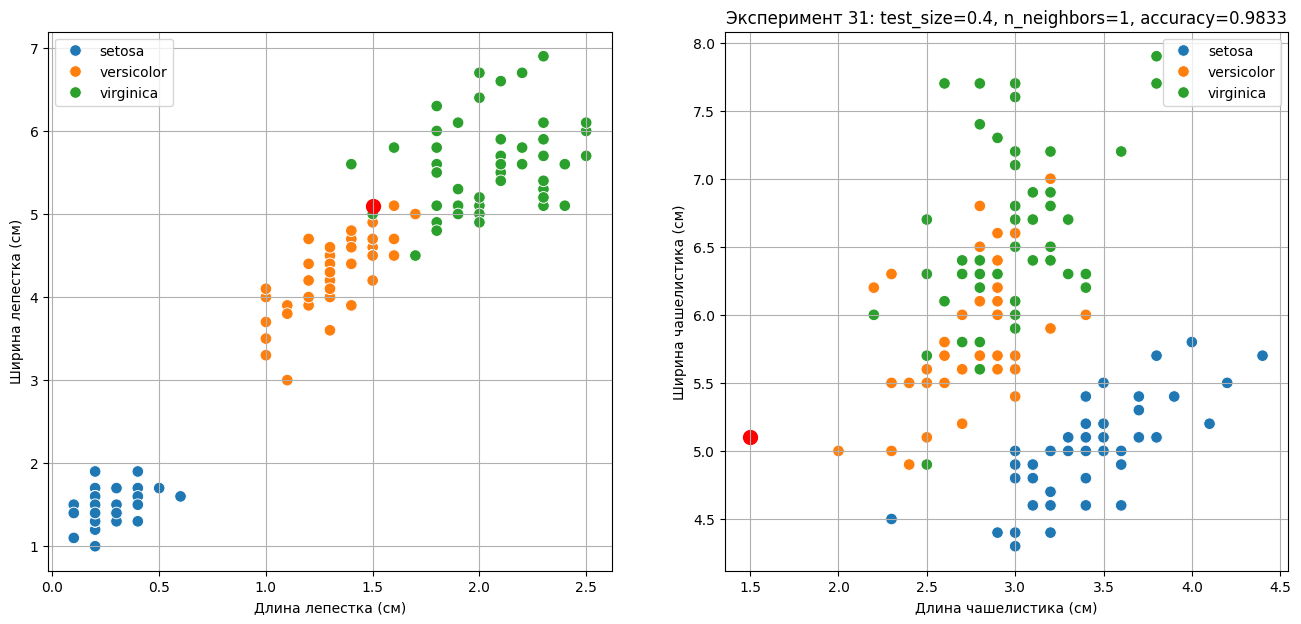

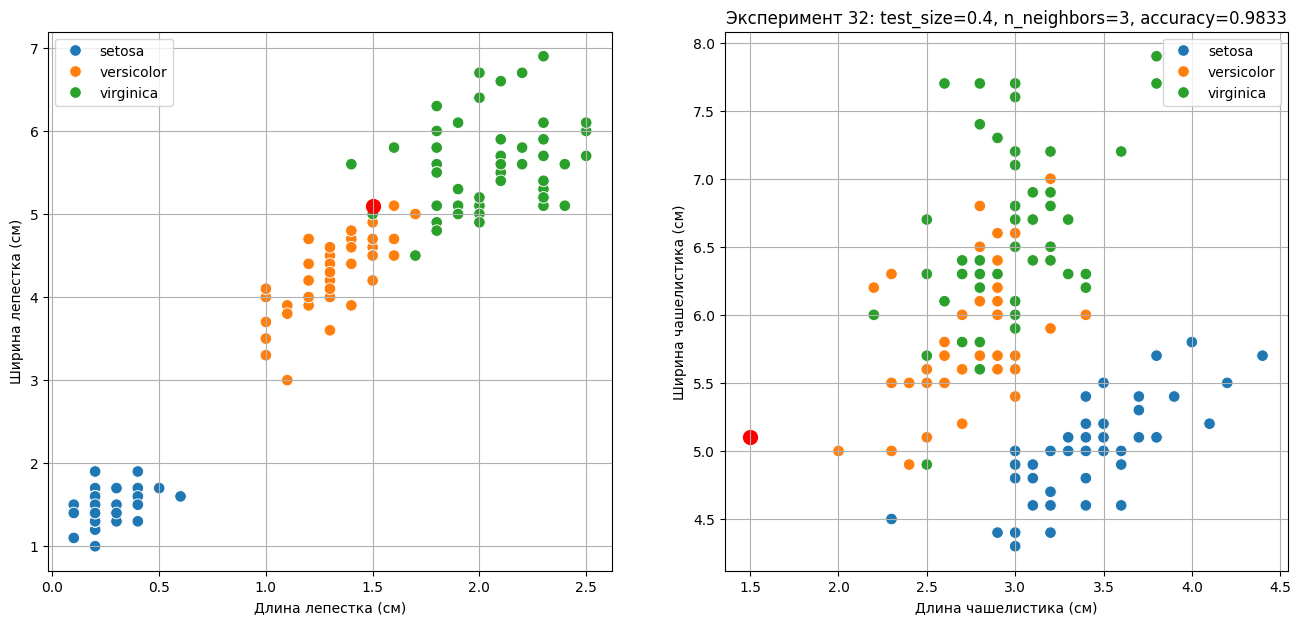

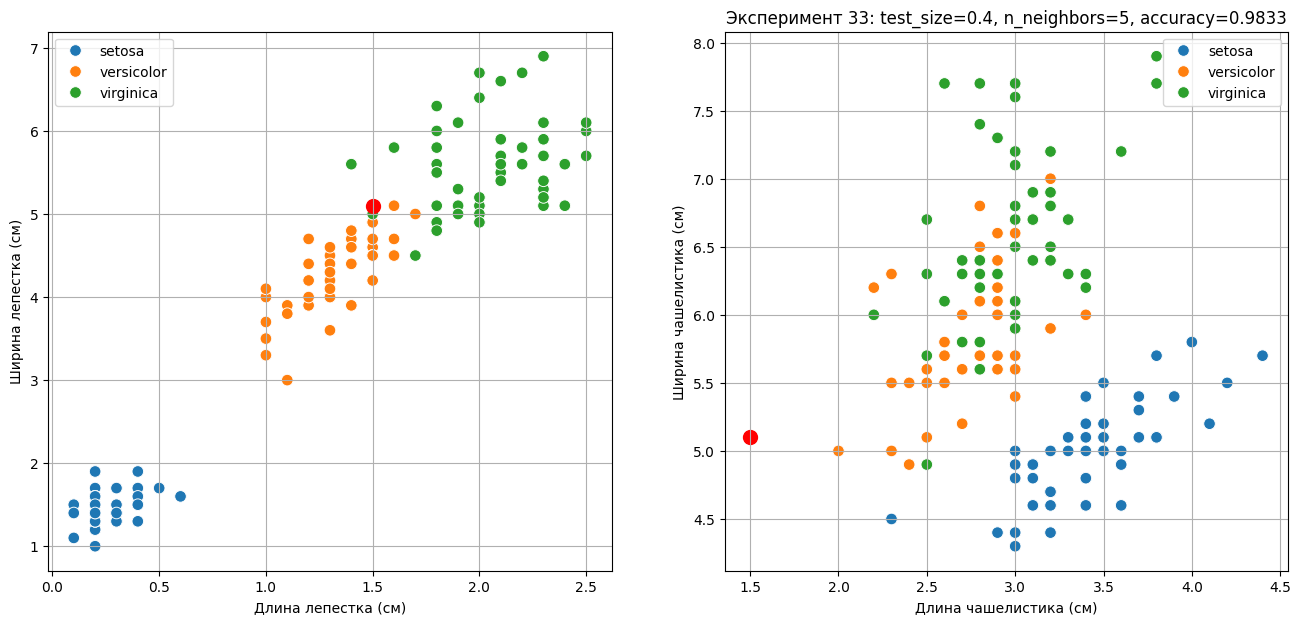

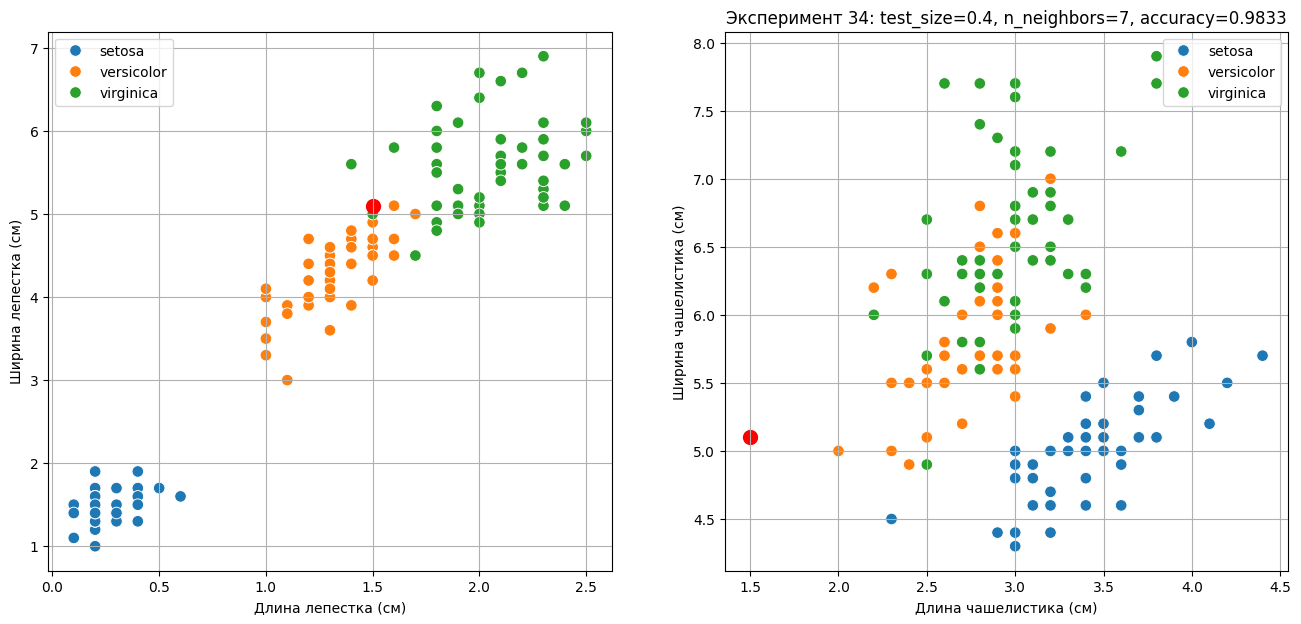

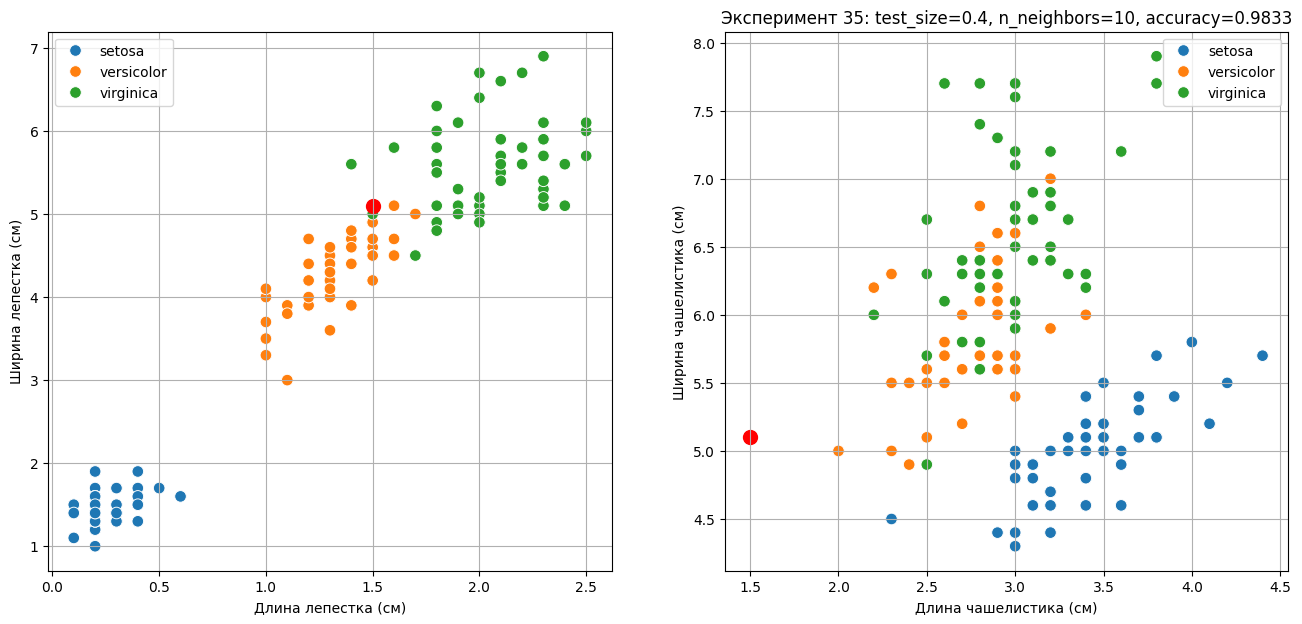

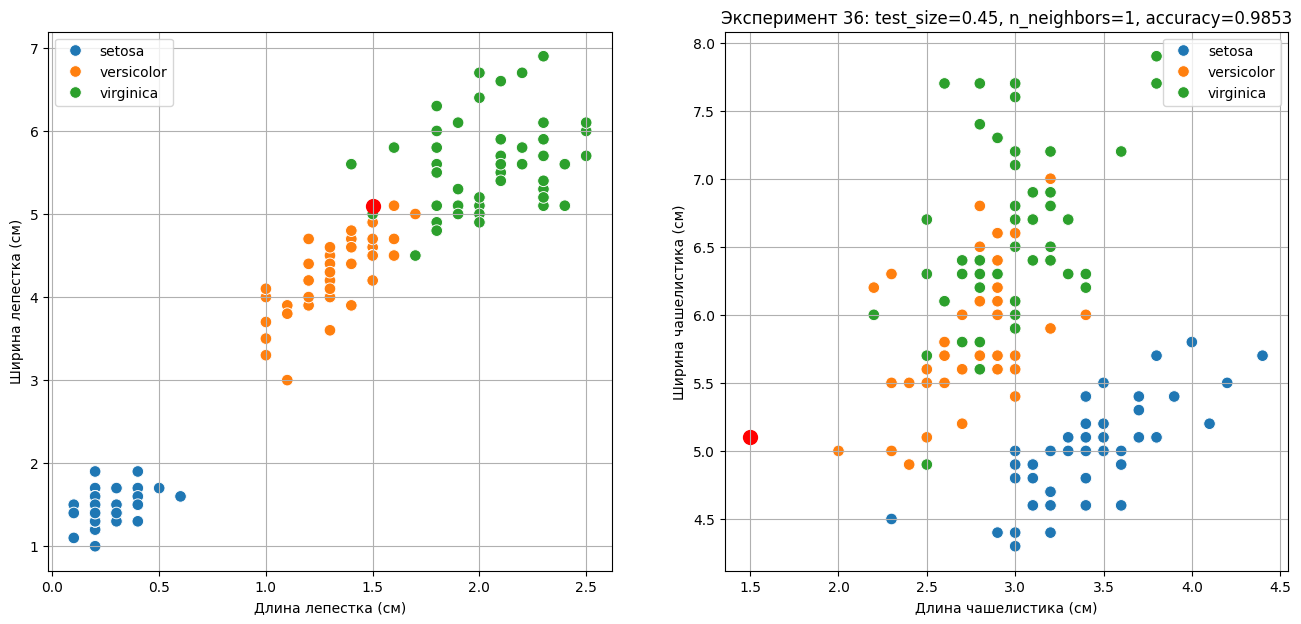

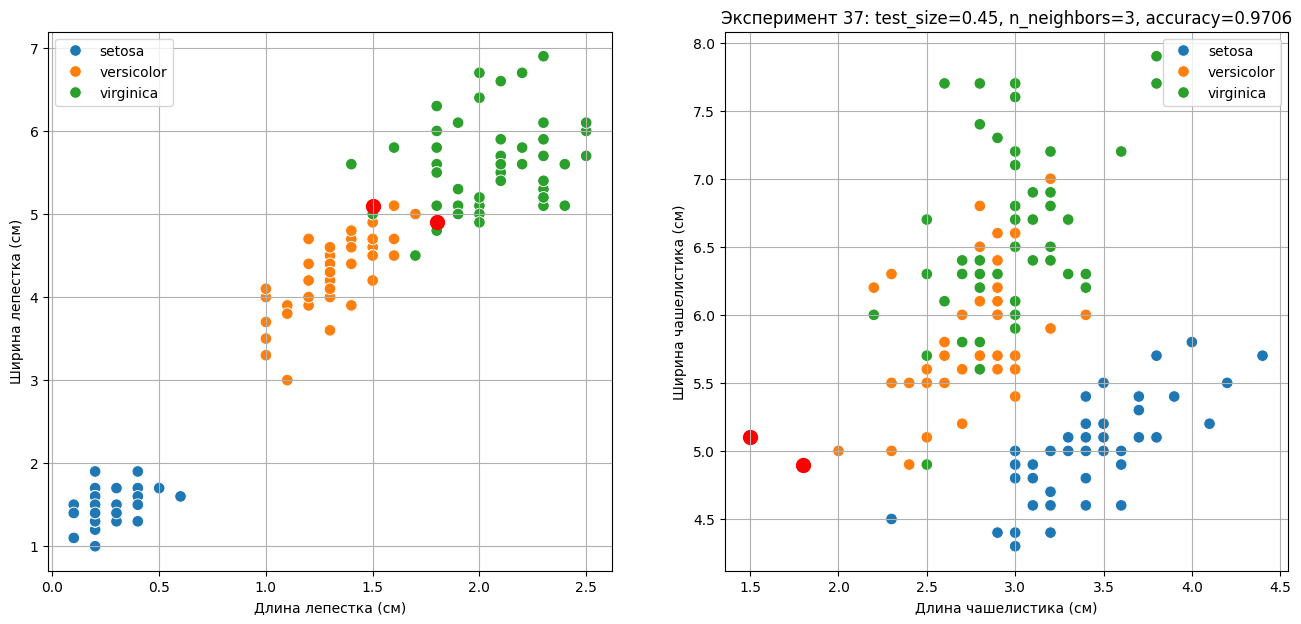

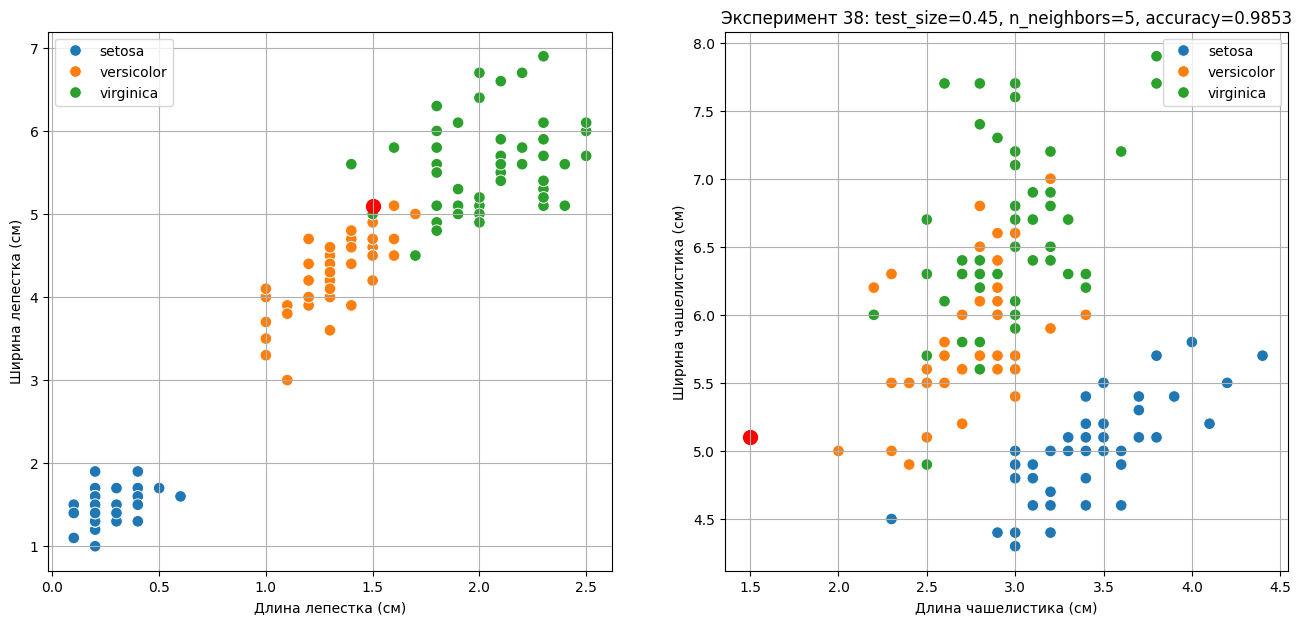

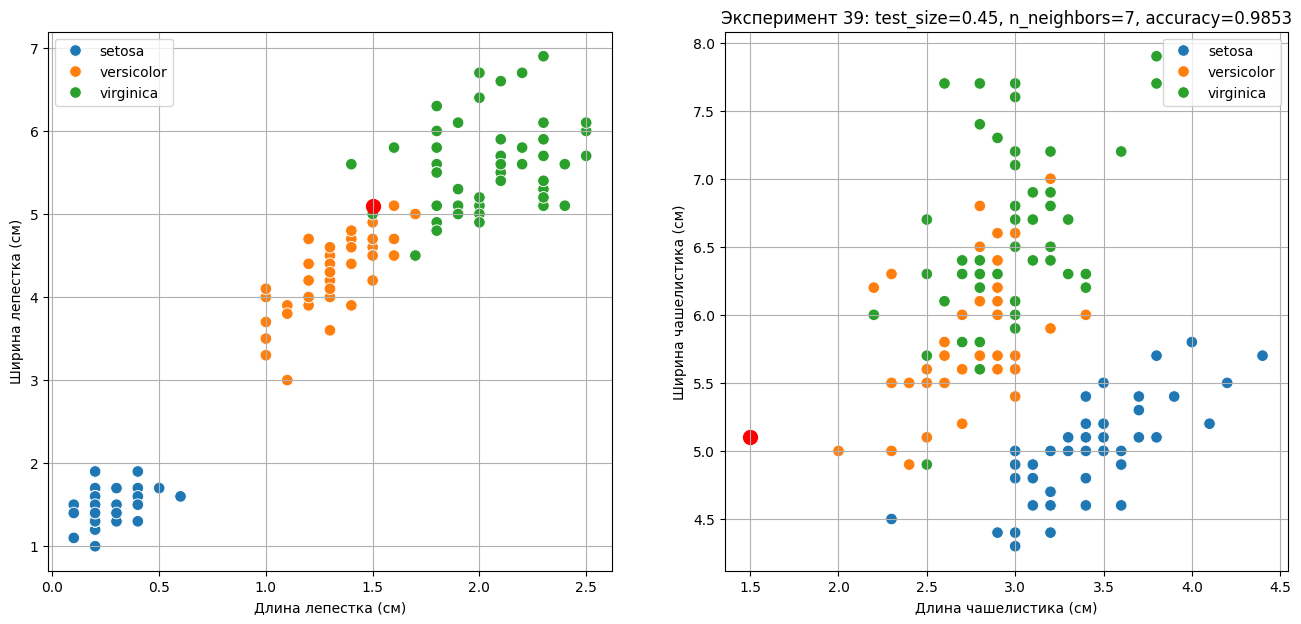

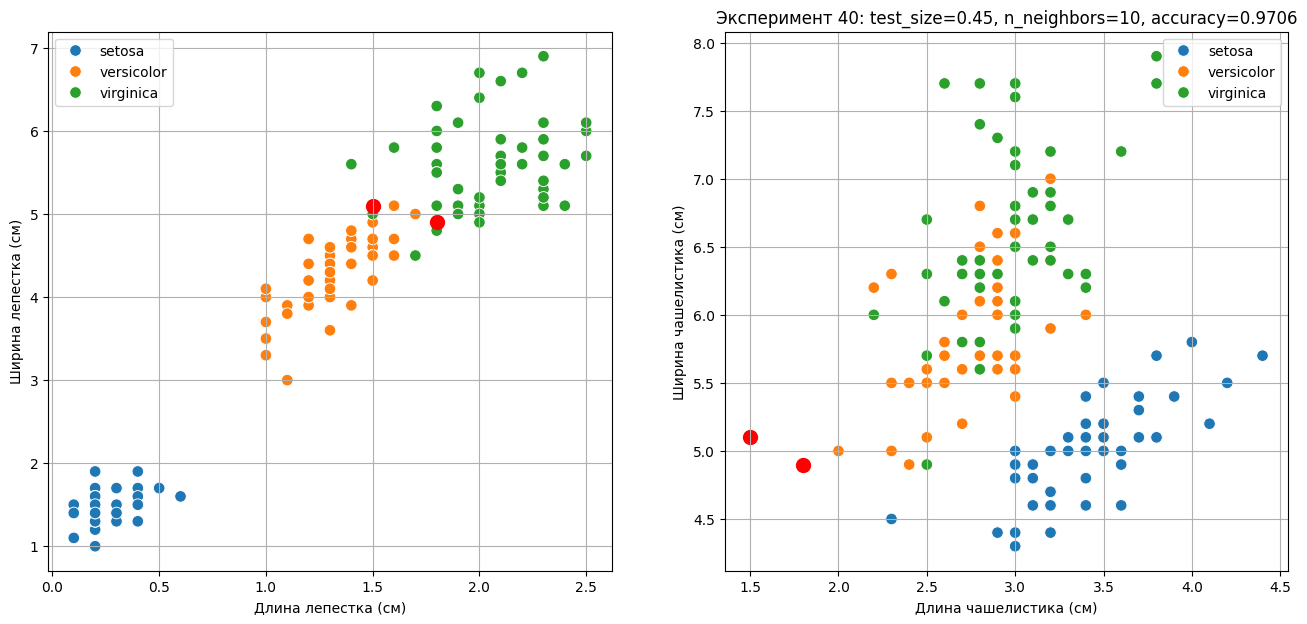

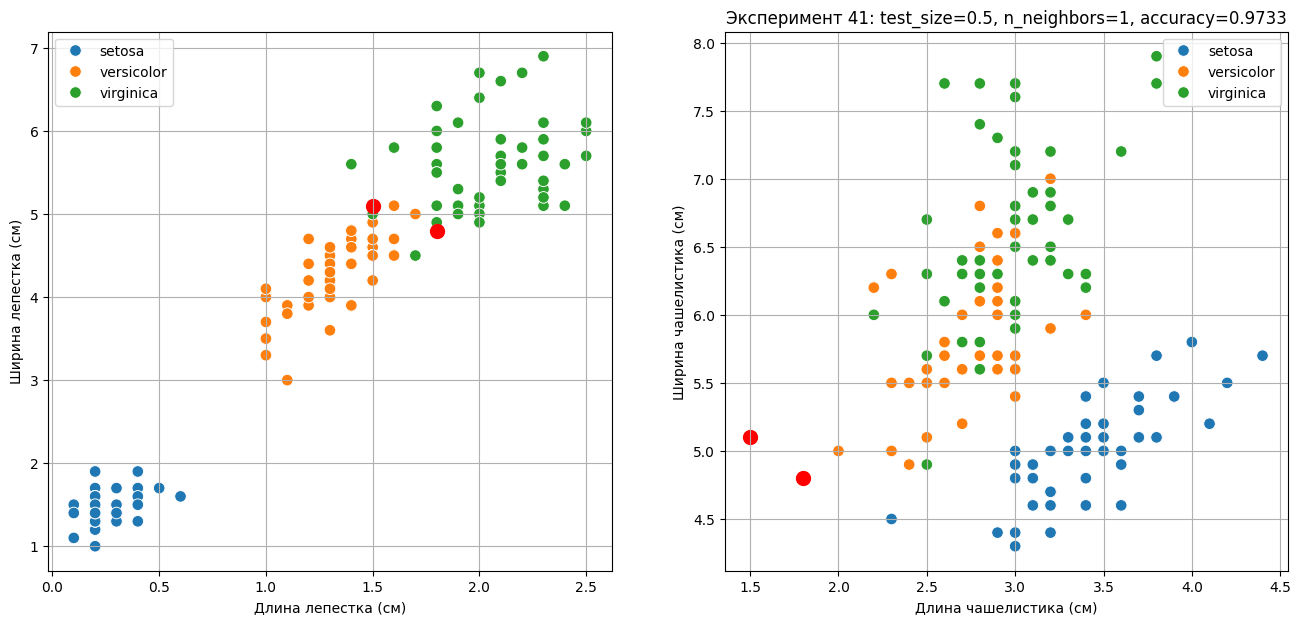

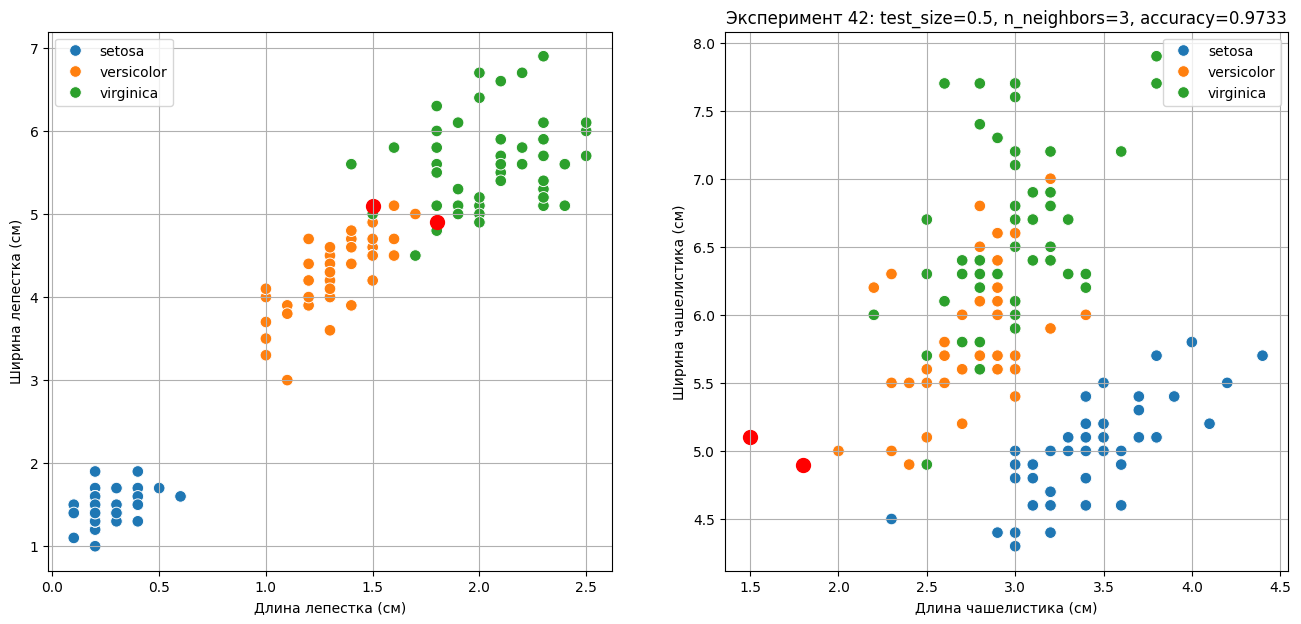

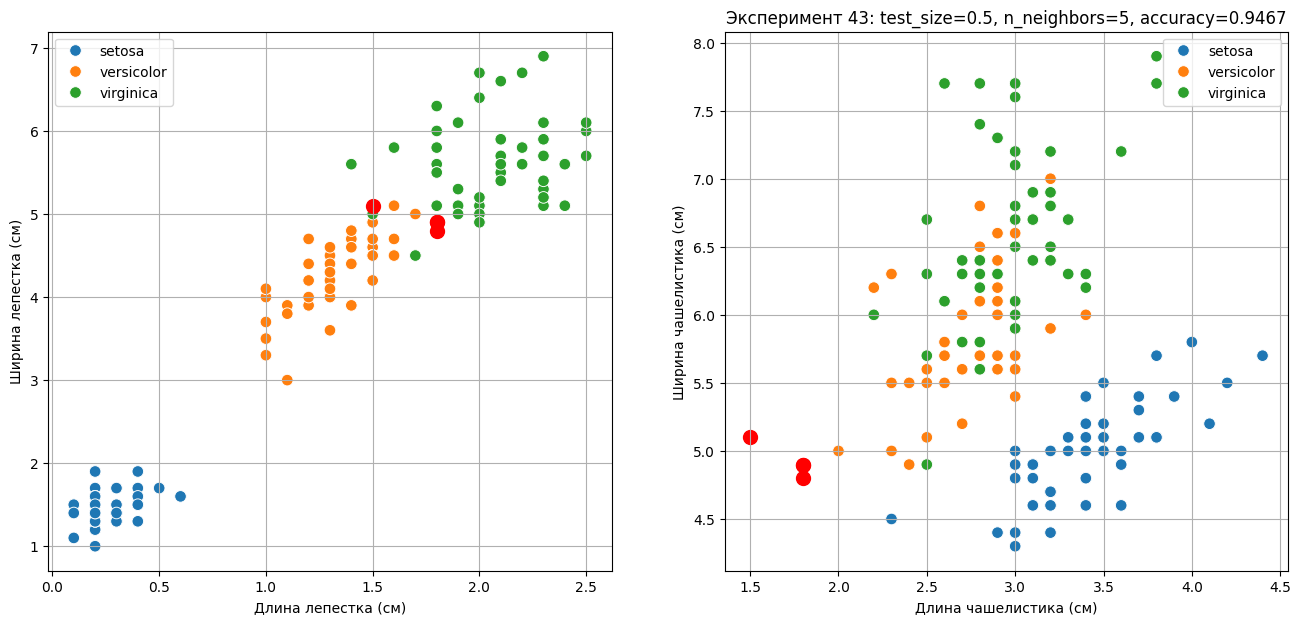

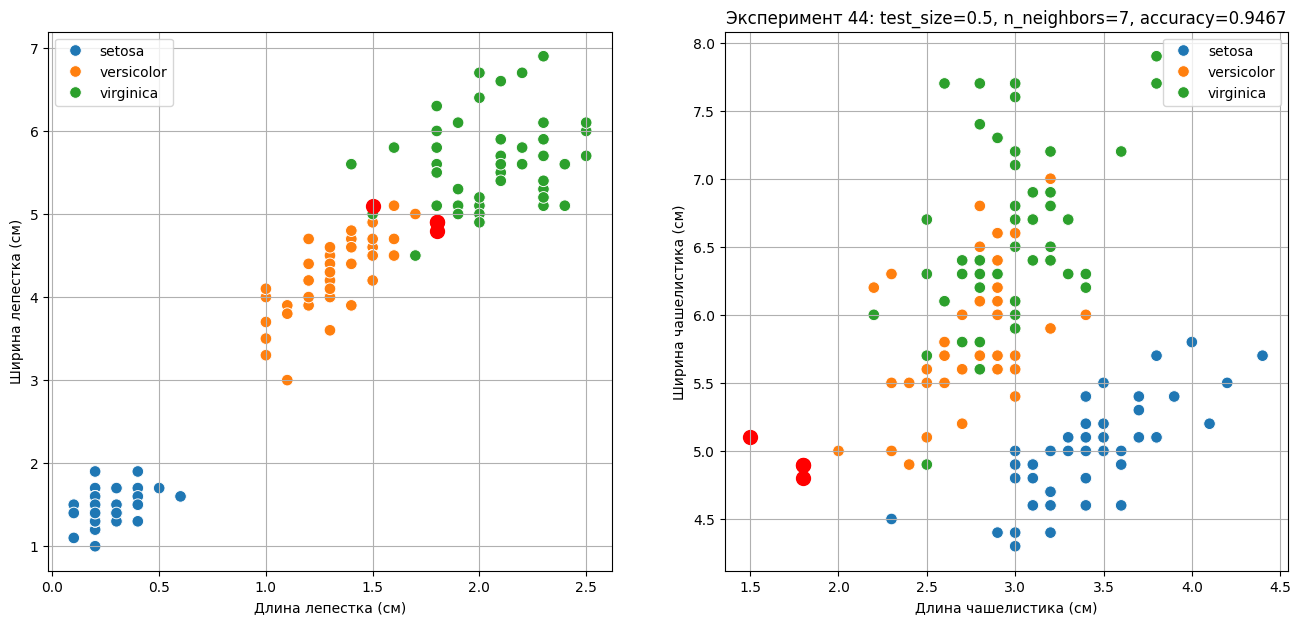

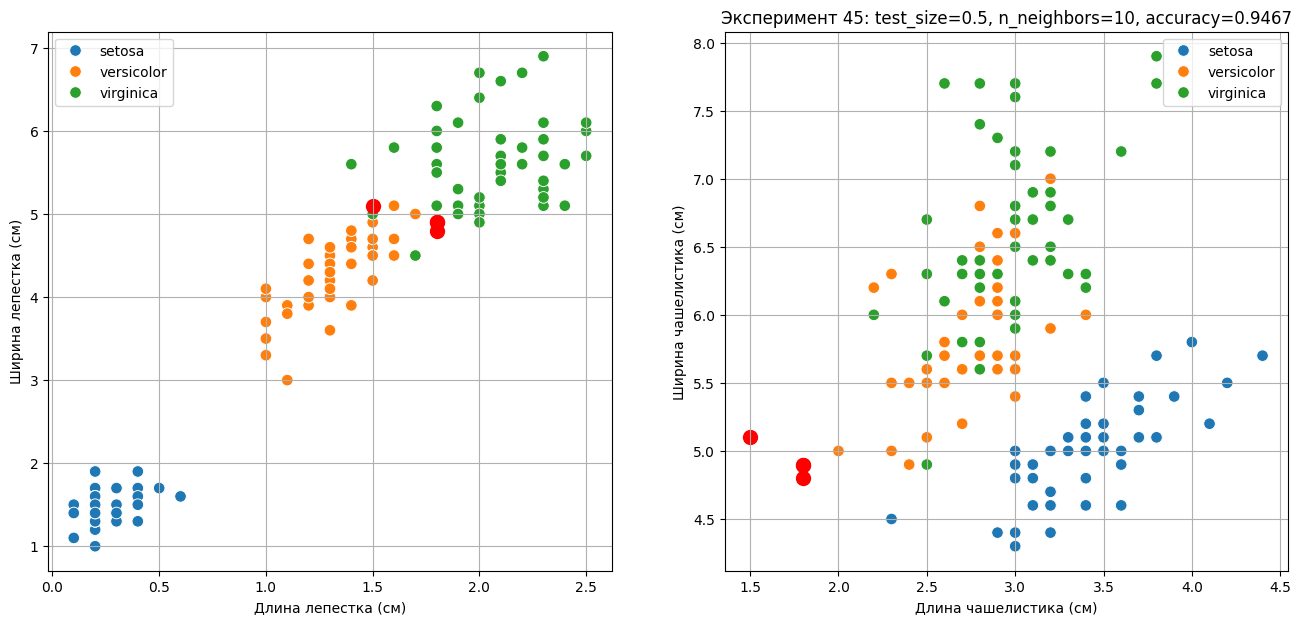

In [16]:
for test_size in params_grid['test_size']:
    for n_neighbors in params_grid['n_neighbors']:
        print(f'test_size = {test_size}, n_neighbors = {n_neighbors}')

        results = apply_params_and_train(data, test_size=test_size, n_neighbors=n_neighbors)
        visualize_errors_plt(
            data,
            results['prediction'],
            results['y_test'], results['X_test'],
            test_size, n_neighbors,
            results['accuracy'],
            len(research_results)
            )

        research_results[(test_size, n_neighbors)] = results

        print('\n\n')

In [17]:
accuracy_table = pd.DataFrame(
    research_results.values(),
    index=research_results.keys(),
    columns=['accuracy']
    )

In [18]:
accuracy_table = accuracy_table.T

In [19]:
accuracy_table

0.10                          0.15                           ...  \
           1    3    5         7    10   1    3    5         7    10  ...   
accuracy  1.0  1.0  1.0  0.933333  1.0  1.0  1.0  1.0  0.956522  1.0  ...   

              0.45                                              0.50  \
                1         3         5         7         10        1    
accuracy  0.985294  0.970588  0.985294  0.985294  0.970588  0.973333   

                                                  
                3         5         7         10  
accuracy  0.973333  0.946667  0.946667  0.946667  

[1 rows x 45 columns]

In [20]:
accuracy_table.to_csv('accuracy_table.csv')

### 3.3

#### 3.3.2

In [21]:
df_categorials = pd.DataFrame(
    {'Цвет глаз': ['Карий', 'Серый', 'Зелёный', 'Голубой', 'Синий', 'Фиолетовый']}
)
df_categorials

Цвет глаз
0       Карий
1       Серый
2     Зелёный
3     Голубой
4       Синий
5  Фиолетовый

In [22]:
scale_mapper = {
    'Карий': 1,
    'Серый': 2,
    'Зелёный': 3,
    'Голубой': 4,
    'Синий': 5,
    'Фиолетовый': 6
}

In [23]:
df_categorials_scaled = df_categorials['Цвет глаз'].replace(scale_mapper)
df_categorials_scaled

C:\Users\pyramidheadshark\AppData\Local\Temp\ipykernel_21996\4073867522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categorials_scaled = df_categorials['Цвет глаз'].replace(scale_mapper)


0    1
1    2
2    3
3    4
4    5
5    6
Name: Цвет глаз, dtype: int64